In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/us-accidents/US_Accidents_March23.csv")
print(df['Severity'].value_counts(normalize=True))

Severity
2    0.796670
3    0.168125
4    0.026488
1    0.008717
Name: proportion, dtype: float64


In [2]:
total_rows = 100_000

# Stratified sampling by Severity
sample_df = (
    df.groupby('Severity', group_keys=False)
      .apply(lambda x: x.sample(
          n=int(total_rows * len(x) / len(df)),
          random_state=42
      ))
)

# Check proportions
print(sample_df['Severity'].value_counts(normalize=True))

sample_df.to_csv("UsAccidents_sample.csv", index=False)

/tmp/ipykernel_19/2377562168.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(


Severity
2    0.796686
3    0.168123
4    0.026481
1    0.008710
Name: proportion, dtype: float64


In [3]:
data = pd.read_csv("/kaggle/working/UsAccidents_sample.csv")
data.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

ID   Source  Severity           Start_Time             End_Time  \
0  A-7195222  Source1         1  2020-04-24 15:37:19  2020-04-24 15:52:19   
1   A-616940  Source2         1  2022-05-19 16:22:20  2022-05-19 17:37:09   
2   A-518369  Source2         1  2022-09-02 11:11:08  2022-09-02 12:07:54   
3  A-7143782  Source1         1  2020-03-29 17:26:56  2020-03-29 18:26:56   
4   A-606813  Source2         1  2022-05-30 20:22:13  2022-05-30 21:06:53   

   Start_Lat   Start_Lng   End_Lat    End_Lng  Distance(mi)  ... Roundabout  \
0  38.087530  -85.667570  38.08753  -85.66757           0.0  ...      False   
1  34.860432  -82.270523       NaN        NaN           0.0  ...      False   
2  35.142311  -85.247063       NaN        NaN           0.0  ...      False   
3  33.494830 -112.030210  33.49483 -112.03021           0.0  ...      False   
4  38.660870 -121.346870       NaN        NaN           0.0  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False           True        False            Day   
1   False  False           False           True        False            Day   
2   False  False           False          False        False            Day   
3   False  False           False           True        False            Day   
4   False  False           False           True        False          Night   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0            Day               Day                   Day  
1            Day               Day                   Day  
2            Day               Day                   Day  
3            Day               Day                   Day  
4            Day               Day                   Day  

[5 rows x 46 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99998 entries, 0 to 99997
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     99998 non-null  object 
 1   Source                 99998 non-null  object 
 2   Severity               99998 non-null  int64  
 3   Start_Time             99998 non-null  object 
 4   End_Time               99998 non-null  object 
 5   Start_Lat              99998 non-null  float64
 6   Start_Lng              99998 non-null  float64
 7   End_Lat                56069 non-null  float64
 8   End_Lng                56069 non-null  float64
 9   Distance(mi)           99998 non-null  float64
 10  Description            99998 non-null  object 
 11  Street                 99852 non-null  object 
 12  City                   99992 non-null  object 
 13  County                 99998 non-null  object 
 14  State                  99998 non-null  object 
 15  Zi

In [5]:
!pip install missingno

<Axes: >

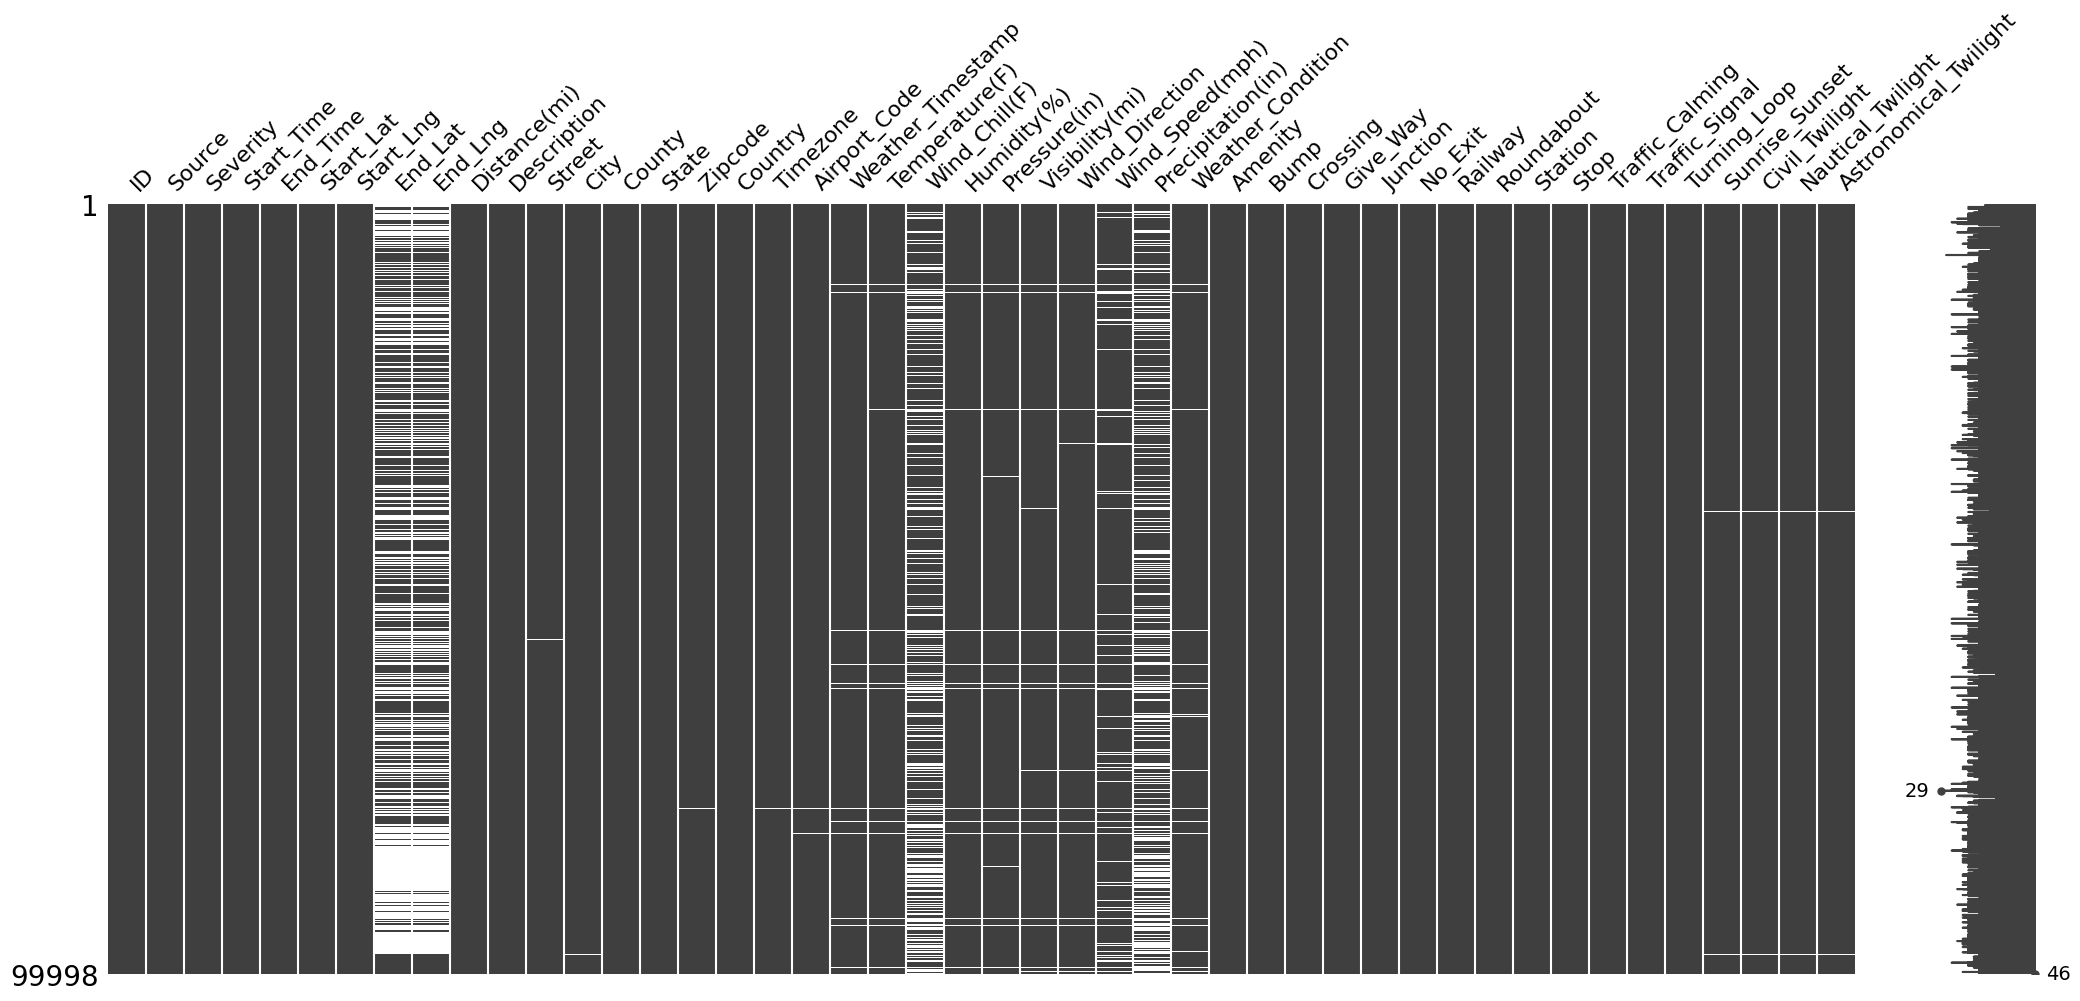

In [6]:
import missingno
missingno.matrix(data)

<Axes: >

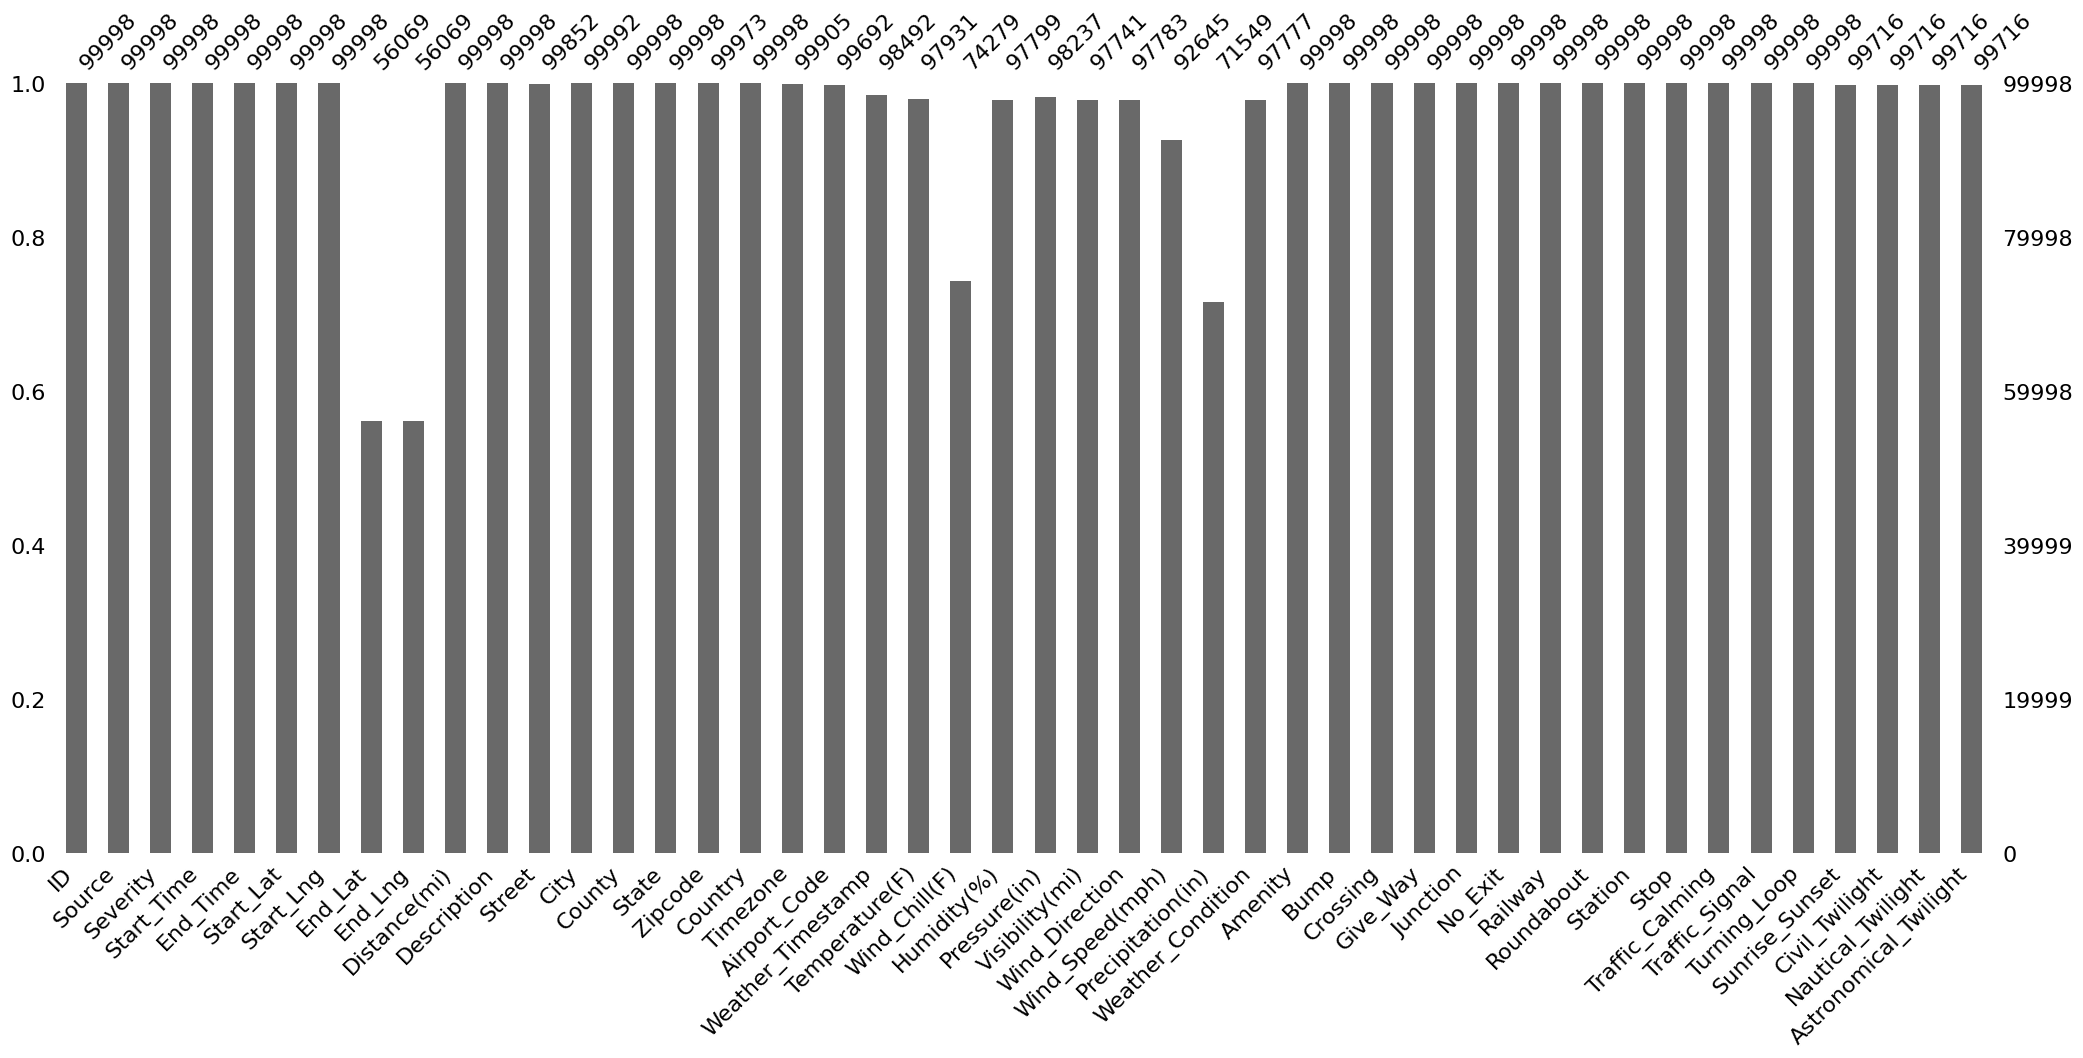

In [7]:
missingno.bar(data)

In [8]:
print(data.duplicated().sum())
data.drop_duplicates()

0


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

ID   Source  Severity           Start_Time             End_Time  \
0      A-7195222  Source1         1  2020-04-24 15:37:19  2020-04-24 15:52:19   
1       A-616940  Source2         1  2022-05-19 16:22:20  2022-05-19 17:37:09   
2       A-518369  Source2         1  2022-09-02 11:11:08  2022-09-02 12:07:54   
3      A-7143782  Source1         1  2020-03-29 17:26:56  2020-03-29 18:26:56   
4       A-606813  Source2         1  2022-05-30 20:22:13  2022-05-30 21:06:53   
...          ...      ...       ...                  ...                  ...   
99993  A-3414058  Source1         4  2016-03-31 19:59:42  2016-04-01 01:59:42   
99994  A-3504910  Source1         4  2016-07-12 17:09:50  2016-07-12 23:09:50   
99995  A-5380021  Source1         4  2022-12-07 15:09:37  2022-12-07 16:48:38   
99996  A-7695074  Source1         4  2017-08-12 23:11:15  2017-08-13 05:11:15   
99997  A-7755614  Source1         4  2019-07-08 17:56:38  2019-07-08 18:25:24   

       Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  ...  \
0      38.087530  -85.667570  38.087530  -85.667570         0.000  ...   
1      34.860432  -82.270523        NaN         NaN         0.000  ...   
2      35.142311  -85.247063        NaN         NaN         0.000  ...   
3      33.494830 -112.030210  33.494830 -112.030210         0.000  ...   
4      38.660870 -121.346870        NaN         NaN         0.000  ...   
...          ...         ...        ...         ...           ...  ...   
99993  38.795270 -121.311920  38.795204 -121.300755         0.601  ...   
99994  38.027635  -79.140615  38.021314  -79.140402         0.437  ...   
99995  38.498180  -78.932570  38.499357  -78.935562         0.181  ...   
99996  34.014331 -117.343369  34.001650 -117.351870         1.002  ...   
99997  39.914136  -83.066600  39.916208  -83.065111         0.163  ...   

      Roundabout Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
0          False   False  False           False           True        False   
1          False   False  False           False           True        False   
2          False   False  False           False          False        False   
3          False   False  False           False           True        False   
4          False   False  False           False           True        False   
...          ...     ...    ...             ...            ...          ...   
99993      False   False   True           False          False        False   
99994      False   False  False           False          False        False   
99995      False   False  False           False          False        False   
99996      False   False  False           False          False        False   
99997      False   False  False           False          False        False   

      Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0                Day            Day               Day                   Day  
1                Day            Day               Day                   Day  
2                Day            Day               Day                   Day  
3                Day            Day               Day                   Day  
4              Night            Day               Day                   Day  
...              ...            ...               ...                   ...  
99993          Night          Night               Day                   Day  
99994            Day            Day               Day                   Day  
99995            Day            Day               Day                   Day  
99996          Night          Night             Night                 Night  
99997            Day            Day               Day                   Day  

[99998 rows x 46 columns]

In [9]:
nan_per = (data.isna().sum()/len(data)) * 100 
nan_per.round(1)

ID                        0.0
Source                    0.0
Severity                  0.0
Start_Time                0.0
End_Time                  0.0
Start_Lat                 0.0
Start_Lng                 0.0
End_Lat                  43.9
End_Lng                  43.9
Distance(mi)              0.0
Description               0.0
Street                    0.1
City                      0.0
County                    0.0
State                     0.0
Zipcode                   0.0
Country                   0.0
Timezone                  0.1
Airport_Code              0.3
Weather_Timestamp         1.5
Temperature(F)            2.1
Wind_Chill(F)            25.7
Humidity(%)               2.2
Pressure(in)              1.8
Visibility(mi)            2.3
Wind_Direction            2.2
Wind_Speed(mph)           7.4
Precipitation(in)        28.4
Weather_Condition         2.2
Amenity                   0.0
Bump                      0.0
Crossing                  0.0
Give_Way                  0.0
Junction  

# Handling Nan

In [10]:
data['City'] = data['City'].fillna(data['City'].mode()[0])
data['Street'] = data['Street'].fillna(data['Street'].mode()[0])
data['Zipcode'] = data['Zipcode'].fillna(data['Zipcode'].mode()[0])
data['Timezone'] = data['Timezone'].fillna(data['Timezone'].mode()[0])
data['Temperature(F)'] = data['Temperature(F)'].fillna(data['Temperature(F)'].mean())
data['Humidity(%)'] = data['Humidity(%)'].fillna(data['Humidity(%)'].mean())
data['Pressure(in)'] = data['Pressure(in)'].fillna(data['Pressure(in)'].mean())
data['Visibility(mi)'] = data['Visibility(mi)'].fillna(data['Visibility(mi)'].mean())
data['Wind_Direction'] = data['Wind_Direction'].fillna(data['Wind_Direction'].mode()[0])
data['Weather_Condition'] = data['Weather_Condition'].fillna(data['Weather_Condition'].mode()[0])
data['Wind_Speed(mph)'] = data['Wind_Speed(mph)'].fillna(data['Wind_Speed(mph)'].mean())
data['Airport_Code'] = data['Airport_Code'].fillna(data['Airport_Code'].mode()[0])

In [11]:
data['Sunrise_Sunset'] = data['Sunrise_Sunset'].fillna(data['Sunrise_Sunset'].mode()[0])
data['Civil_Twilight'] = data['Civil_Twilight'].fillna(data['Civil_Twilight'].mode()[0])
data['Nautical_Twilight'] = data['Nautical_Twilight'].fillna(data['Nautical_Twilight'].mode()[0])
data['Astronomical_Twilight'] = data['Astronomical_Twilight'].fillna(data['Astronomical_Twilight'].mode()[0])

## Convert to time

In [12]:
data['Start_Time']=pd.to_datetime(data['Start_Time'],format='mixed')
data['End_Time']=pd.to_datetime(data['End_Time'],format='mixed')
data['Weather_Timestamp'] = pd.to_datetime(data['Weather_Timestamp'],format='mixed')

## Feature Engineering

In [13]:
data['Accident_Duration(hr)'] = (data['End_Time'] - data['Start_Time']).dt.total_seconds() / 3600

data['Accident_Duration(min)'] = (data['End_Time'] - data['Start_Time']).dt.total_seconds() / 60

data['Start_Time(hr)'] = data['Start_Time'].dt.hour

data['Start_Time(day)'] = data['Start_Time'].dt.day_name()

In [14]:
data['Description'].value_counts()

Description
A crash has occurred causing no to minimum delays. Use caution.                                                        133
Accident                                                                                                                87
An unconfirmed report of a crash has been received. Use caution.                                                        53
A crash has occurred use caution.                                                                                       37
A crash has occurred with minimal delay to traffic. Prepare to slow or move over for worker safety.                     35
                                                                                                                      ... 
Accident on San Gabriel River Fwy N - I-605 N from Valley Blvd (I-605) to I-10/San Bernardino Fwy (I-605).               1
Lane blocked due to accident on PA-150 Southbound at Benner Pike.                                                        1
Righ

## Dropped Columns

In [15]:
data.drop(['End_Lat','End_Lng','Wind_Chill(F)','Precipitation(in)','ID'],axis=1,inplace=True)
data.drop(['Description','Zipcode','Weather_Timestamp'],axis=1,inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99998 entries, 0 to 99997
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Source                  99998 non-null  object        
 1   Severity                99998 non-null  int64         
 2   Start_Time              99998 non-null  datetime64[ns]
 3   End_Time                99998 non-null  datetime64[ns]
 4   Start_Lat               99998 non-null  float64       
 5   Start_Lng               99998 non-null  float64       
 6   Distance(mi)            99998 non-null  float64       
 7   Street                  99998 non-null  object        
 8   City                    99998 non-null  object        
 9   County                  99998 non-null  object        
 10  State                   99998 non-null  object        
 11  Country                 99998 non-null  object        
 12  Timezone                99998 non-null  object

### Correlations

Text(0.5, 1.0, 'Correlation Heatmap of Numeric Columns')

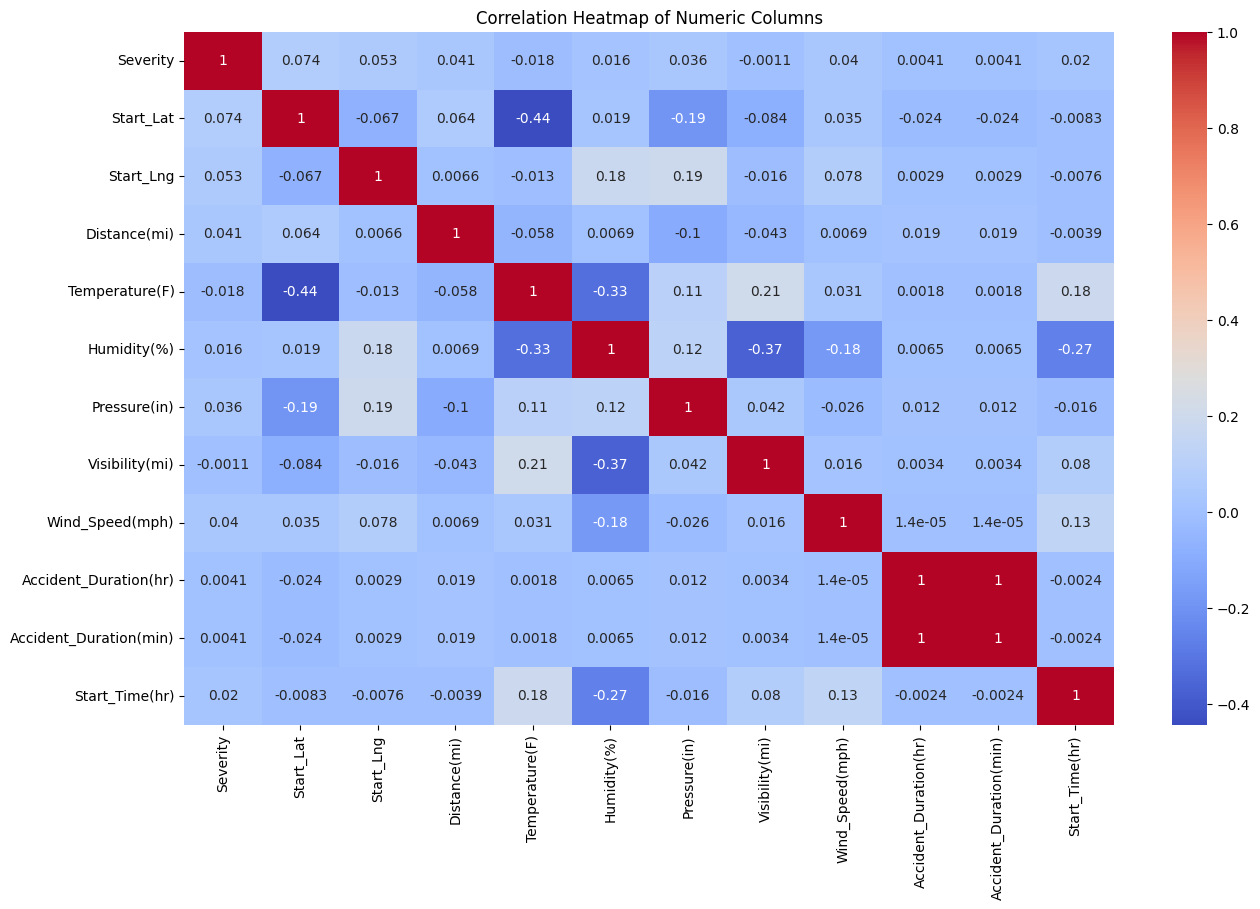

In [17]:
numeric_data = data.select_dtypes(include='number')
plt.figure(figsize=(15, 9))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Columns")

### Histograms

array([[<Axes: title={'center': 'Severity'}>,
        <Axes: title={'center': 'Start_Time'}>,
        <Axes: title={'center': 'End_Time'}>,
        <Axes: title={'center': 'Start_Lat'}>],
       [<Axes: title={'center': 'Start_Lng'}>,
        <Axes: title={'center': 'Distance(mi)'}>,
        <Axes: title={'center': 'Temperature(F)'}>,
        <Axes: title={'center': 'Humidity(%)'}>],
       [<Axes: title={'center': 'Pressure(in)'}>,
        <Axes: title={'center': 'Visibility(mi)'}>,
        <Axes: title={'center': 'Wind_Speed(mph)'}>,
        <Axes: title={'center': 'Accident_Duration(hr)'}>],
       [<Axes: title={'center': 'Accident_Duration(min)'}>,
        <Axes: title={'center': 'Start_Time(hr)'}>, <Axes: >, <Axes: >]],
      dtype=object)

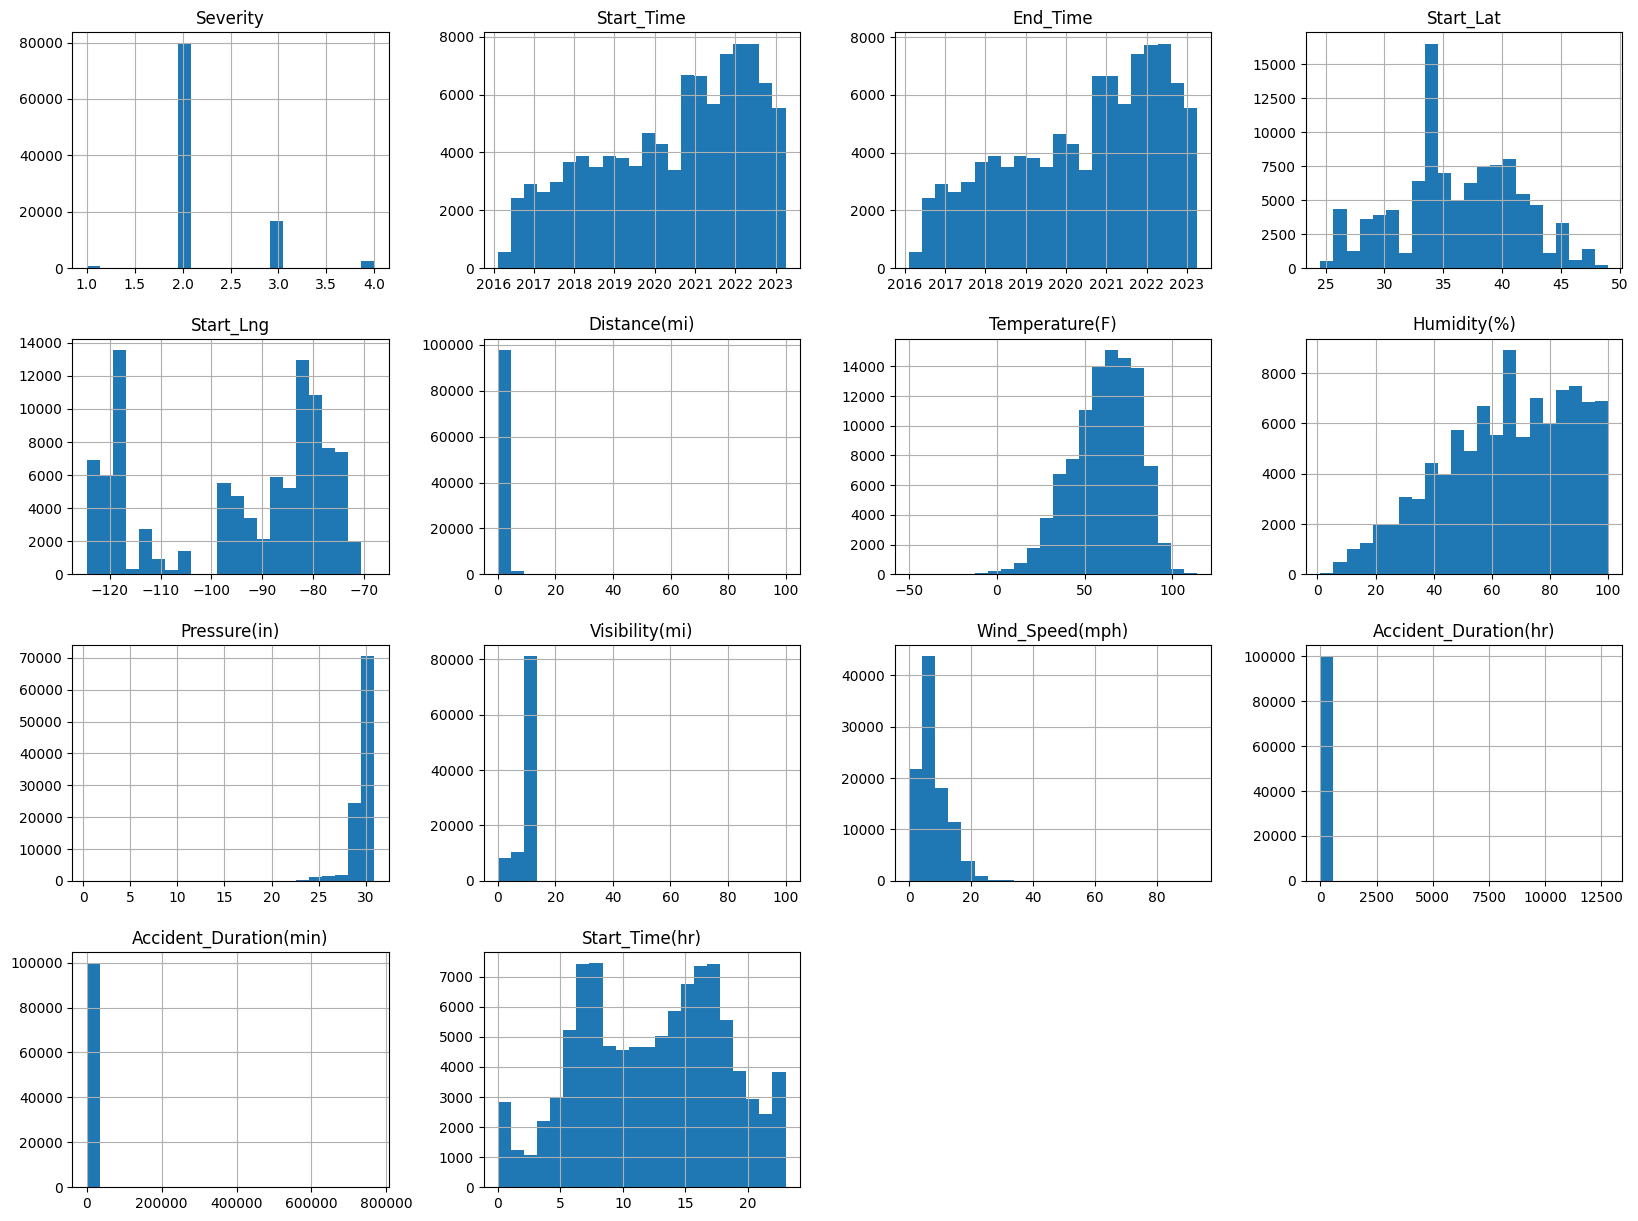

In [18]:
data.hist(bins=22,figsize=(20,15))

### Accidents by Hour

<Axes: title={'center': 'Accidents by Hour'}, xlabel='Start_Time(hr)'>

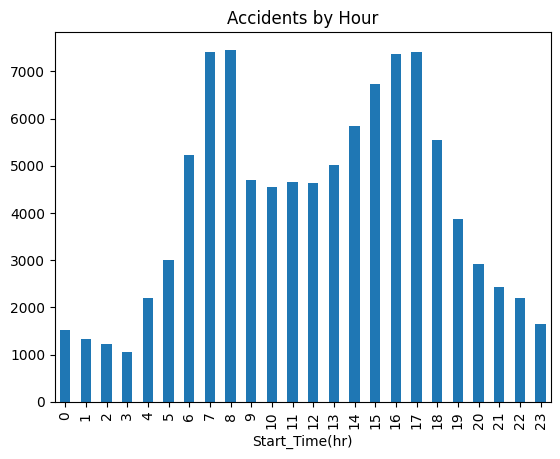

In [19]:
data['Start_Time(hr)'].value_counts().sort_index().plot(kind='bar', title="Accidents by Hour")

In [20]:
data['State'].value_counts()

State
CA    22580
FL    11498
TX     7452
SC     4795
NY     4425
NC     4417
VA     4030
PA     3840
MN     2579
OR     2357
GA     2182
AZ     2171
IL     2138
MI     2126
TN     2095
LA     1960
NJ     1790
MD     1787
OH     1524
WA     1401
AL     1287
UT     1268
CO     1198
OK     1126
MO      958
CT      941
MA      851
IN      851
WI      452
KY      415
NE      361
MT      342
IA      337
NV      282
AR      282
KS      274
DC      267
RI      211
DE      206
MS      187
WV      169
NH      165
ID      161
NM      129
WY       43
ME       35
ND       31
VT       16
SD        6
Name: count, dtype: int64

In [21]:
data['City'].value_counts()

City
Miami          2438
Houston        2159
Los Angeles    2033
Charlotte      1794
Dallas         1671
               ... 
Crabtree          1
Andalusia         1
Cadyville         1
Pearisburg        1
Lonoke            1
Name: count, Length: 6341, dtype: int64

### City

In [22]:
! pip install mplcyberpunk

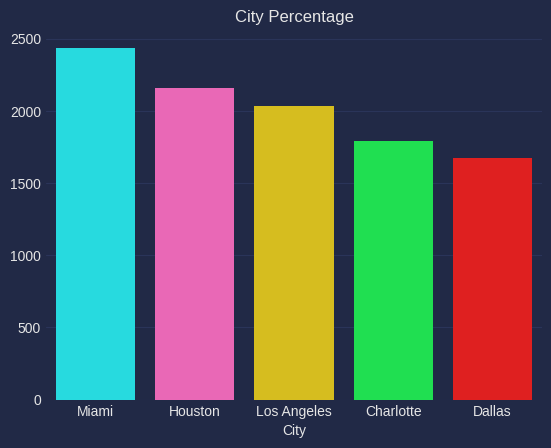

In [23]:
import mplcyberpunk
city5=data['City'].value_counts().head(5)

plt.style.use("cyberpunk")
sns.barplot(data, x=city5.index, y=city5.values)
plt.title("City Percentage")
plt.show()
# px.bar(data,x=city5.index,y=city5.values,title='City Percentage',color=city5.index)

In [24]:
city5

City
Miami          2438
Houston        2159
Los Angeles    2033
Charlotte      1794
Dallas         1671
Name: count, dtype: int64

### weather condition

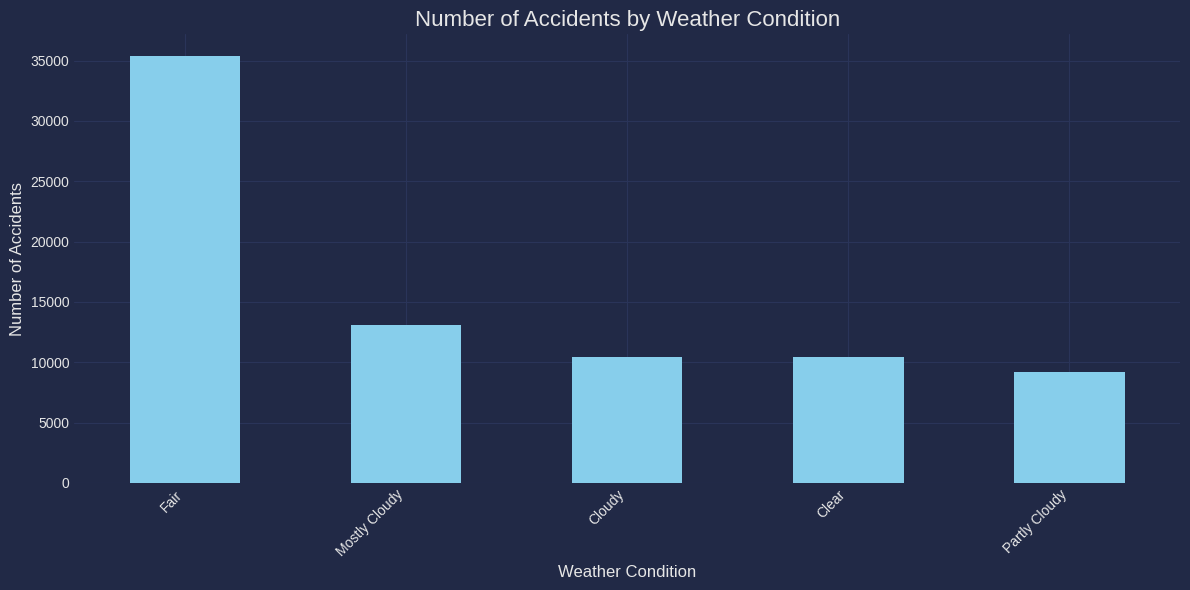

In [25]:
accidents_by_weather = data['Weather_Condition'].value_counts()
accidents_by_weather = data['Weather_Condition'].value_counts().head(5)

plt.figure(figsize=(12, 6))
accidents_by_weather.plot(kind='bar', color='skyblue')

plt.title('Number of Accidents by Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

### Sunrise_Sunset

<Axes: title={'center': 'Day vs Night Accidents'}, ylabel='count'>

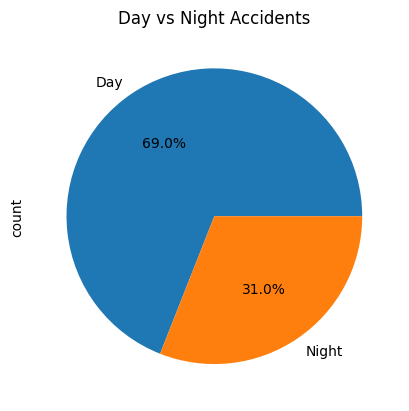

In [26]:
plt.style.use("default")
data['Sunrise_Sunset'].value_counts().plot(kind='pie', title="Day vs Night Accidents",autopct='%1.1f%%')

In [27]:
import plotly.express as px

In [28]:
# fig = px.scatter_mapbox(
#     data,
#     lat='Start_Lat',
#     lon='Start_Lng',
#     color='Severity',              
#     hover_data=['City', 'State'],  
#     zoom=3.4,
#     height=600
# )
# fig.update_layout(mapbox_style='open-street-map')
# fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
# fig.show()

### Severity distribution on map

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


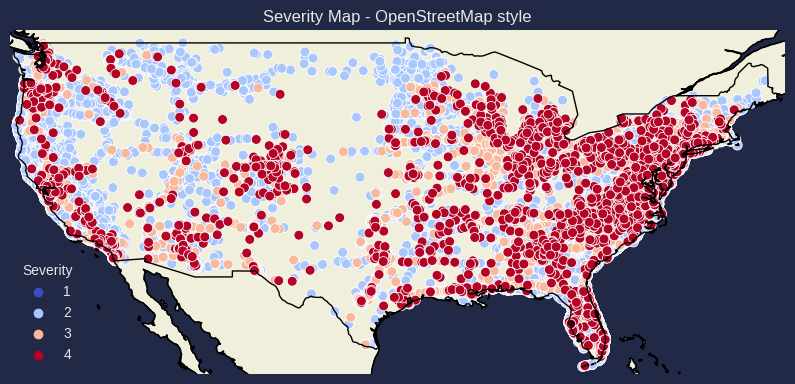

In [29]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.style.use("cyberpunk")
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([-125, -66.5, 24, 50], crs=ccrs.PlateCarree())  # USA bounds

# Scatter plot
sns.scatterplot(
    data=data,
    x="Start_Lng",
    y="Start_Lat",
    hue="Severity",
    palette="coolwarm",
    s=50,
    ax=ax,
    legend="full"
)

# Set labels
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.title("Severity Map - OpenStreetMap style")

plt.show()

In [30]:
night_count = data[data['Sunrise_Sunset'] == 'Night'].shape[0]
day_count = data[data['Sunrise_Sunset'] == 'Day'].shape[0]

if night_count > day_count:
    print("Suggestion: Install more road lights or night visibility signs.")
else:
    print("Day accidents are more. Suggest improving traffic control during busy hours.")

Day accidents are more. Suggest improving traffic control during busy hours.


# Tasneem

### severity by year 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pa

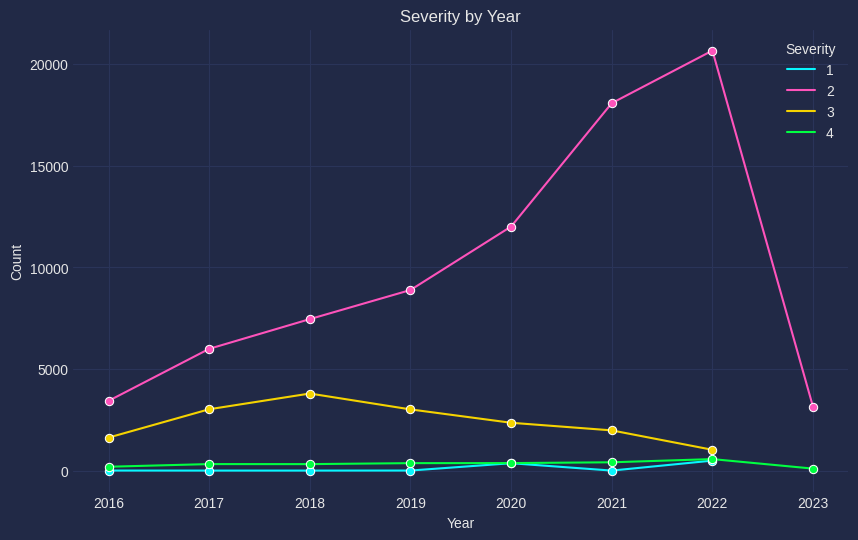

In [31]:
data['start_year']=data['Start_Time'].dt.year
severity_counts = data.groupby('start_year')['Severity'].value_counts().reset_index(name='count')
severity_counts['Severity'] = pd.Categorical(severity_counts['Severity'], categories=[1, 2, 3, 4], ordered=True)

plt.figure(figsize=(10, 6))
sns.lineplot(data=severity_counts, x='start_year', y='count', hue='Severity', marker='o')
plt.title("Severity by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

### accidents by month

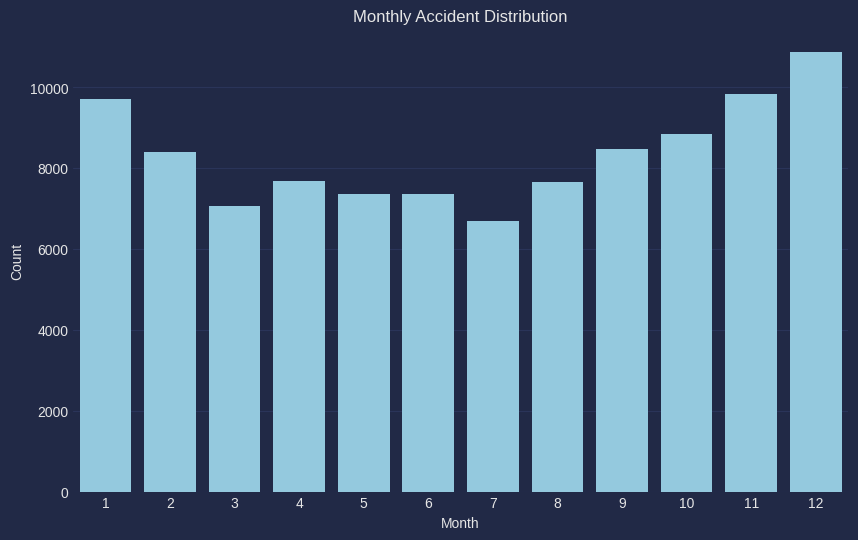

In [32]:
data['start_month']= data['Start_Time'].dt.month
month_counts = data['start_month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, color='skyblue')
plt.title("Monthly Accident Distribution")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

### Group by year and month, count accidents

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

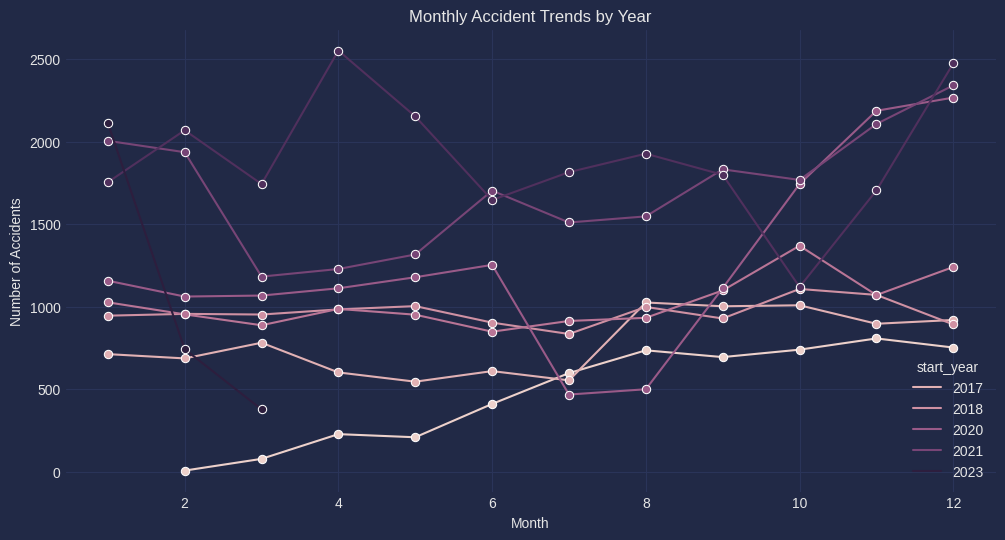

In [33]:
monthly_counts = data.groupby(['start_year', 'start_month']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_counts, x='start_month', y='count', hue='start_year', marker='o')
plt.title("Monthly Accident Trends by Year")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.show()

In [34]:
data['Severity'] = pd.Categorical(data['Severity'], categories=[1, 2, 3, 4], ordered=True)

### hour of day vs severity

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pa

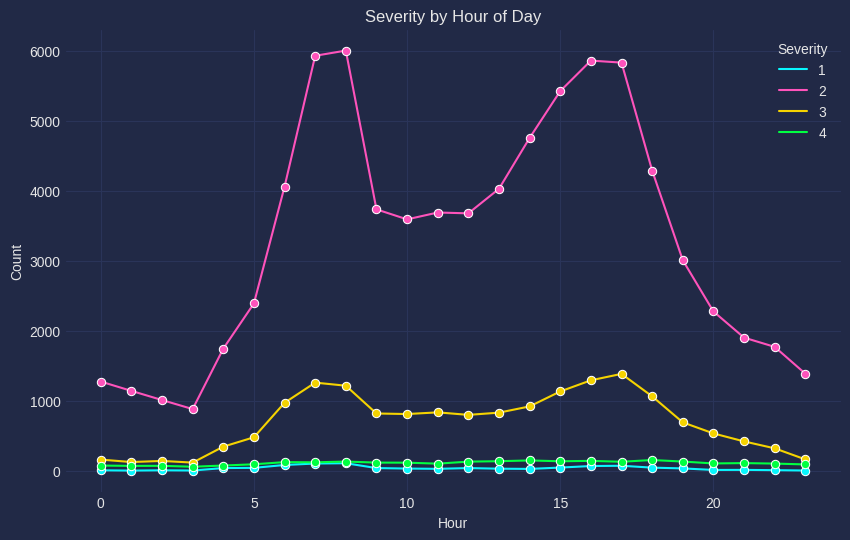

In [35]:
# hour of day vs severity line chart
data['start_hour']=data['Start_Time'].dt.hour
severity_counts = data.groupby('start_hour')['Severity'].value_counts().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.lineplot(data=severity_counts, x='start_hour', y='count', hue='Severity', marker='o')
plt.title("Severity by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


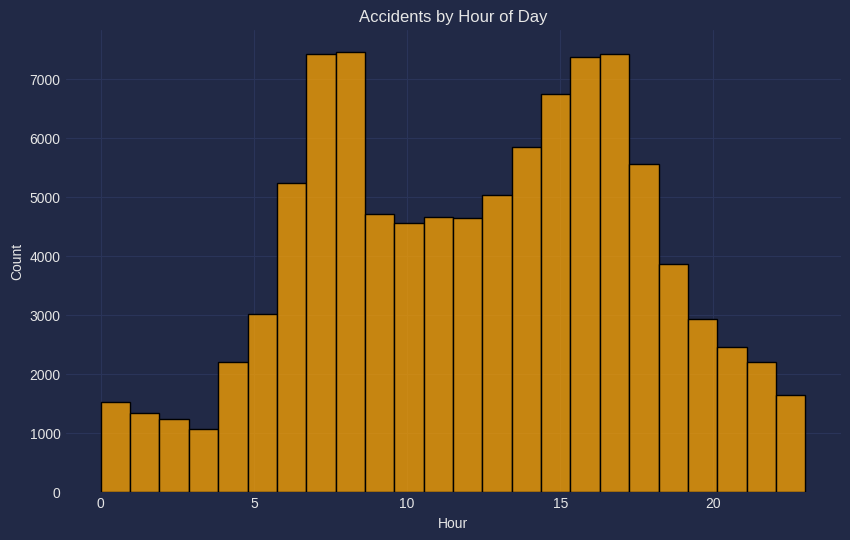

In [36]:
#hour of day vs severity line chart 
plt.figure(figsize=(10, 6))
sns.histplot(data['start_hour'], bins=24, kde=False, color='orange')
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

### accidents by day of the week line chart

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


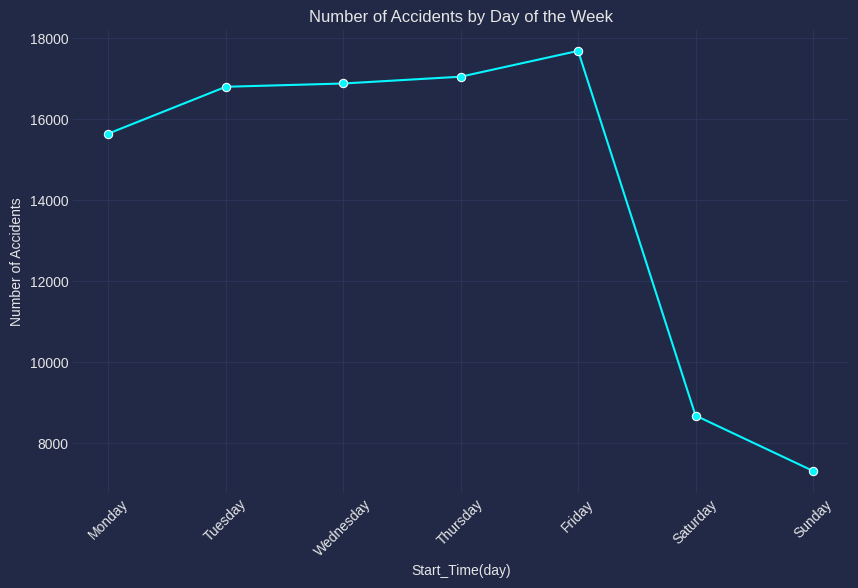

In [37]:
accidents_by_day = data['Start_Time(day)'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure(figsize=(10, 6))
sns.lineplot(x=accidents_by_day.index, y=accidents_by_day.values, marker='o')
plt.title("Number of Accidents by Day of the Week")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

### severity with week days

/tmp/ipykernel_19/749251129.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_days = data.groupby('Severity')['Start_Time(day)'].value_counts().reset_index(name='count')


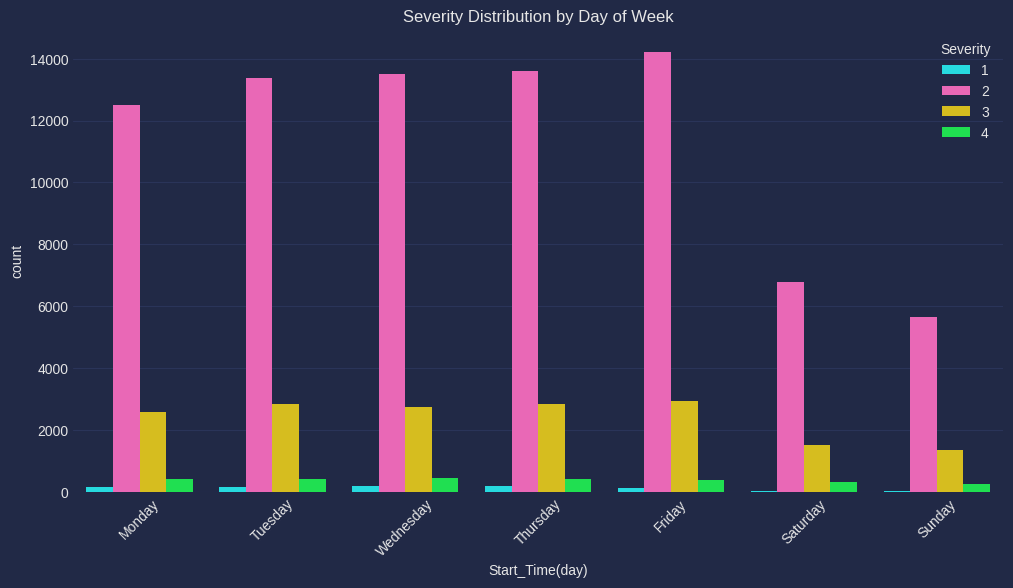

In [38]:
severity_days = data.groupby('Severity')['Start_Time(day)'].value_counts().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.barplot(data=severity_days, x='Start_Time(day)', y='count', hue='Severity',
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Severity Distribution by Day of Week")
plt.xticks(rotation=45)
plt.show()

### Total accidents by state 

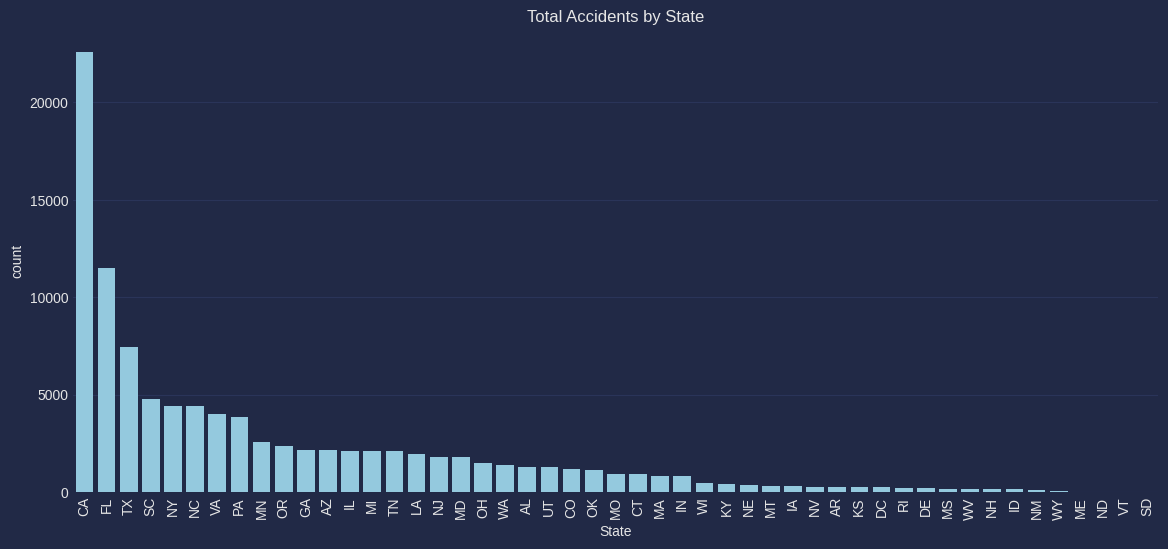

In [39]:
state_counts = data['State'].value_counts().reset_index(name='count')
plt.figure(figsize=(14, 6))
sns.barplot(data=state_counts, x='State', y='count', color='skyblue')
plt.title("Total Accidents by State")
plt.xticks(rotation=90)
plt.show()

### Severity Ratio by State

/tmp/ipykernel_19/330560333.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_sev = data.groupby(['State', 'Severity']).size().reset_index(name='count')


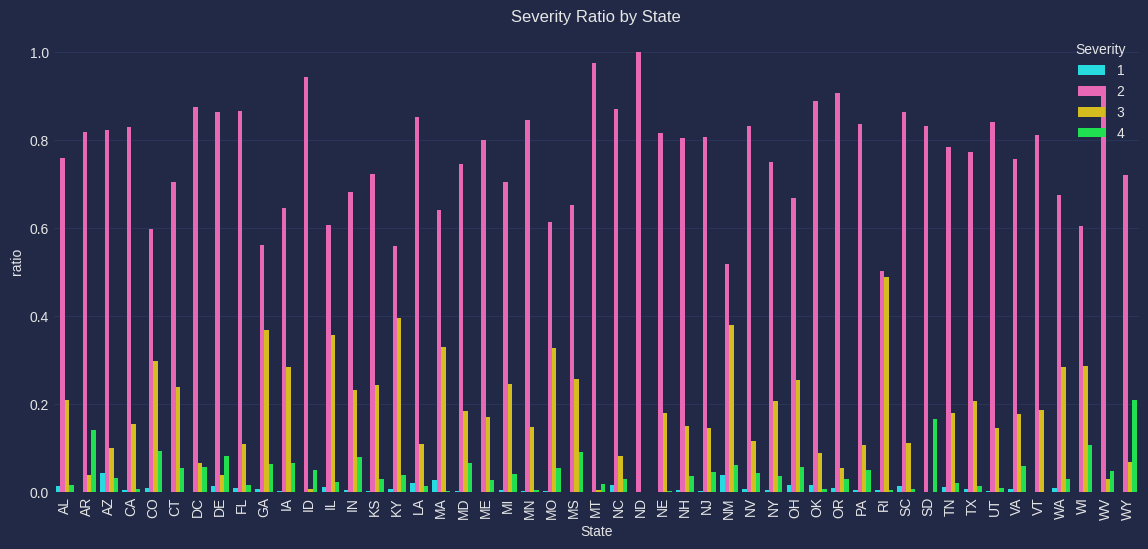

In [40]:
state_sev = data.groupby(['State', 'Severity']).size().reset_index(name='count')
state_total = state_sev.groupby('State')['count'].transform('sum')
state_sev['ratio'] = state_sev['count'] / state_total

plt.figure(figsize=(14, 6))
sns.barplot(data=state_sev, x='State', y='ratio', hue='Severity')
plt.title("Severity Ratio by State")
plt.xticks(rotation=90)
plt.show()

### Top 10 counties with severe accidents (4)

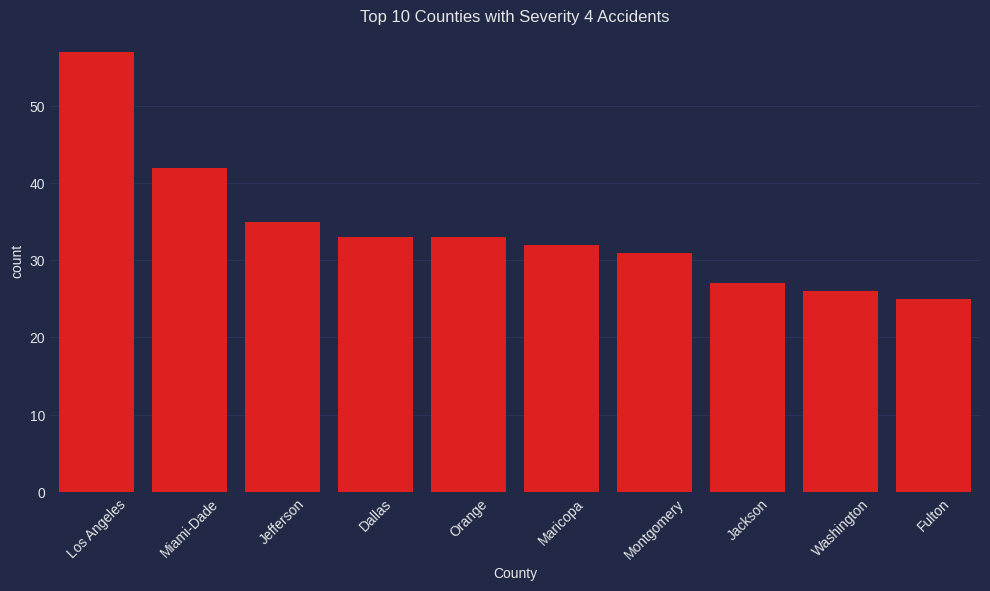

In [41]:
top_counties = data[data['Severity'] == 4].groupby('County').size().reset_index(name='count').nlargest(10, 'count')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_counties, x='County', y='count', color='red')
plt.title("Top 10 Counties with Severity 4 Accidents")
plt.xticks(rotation=45)
plt.show()

### Accidents counts by hour and day

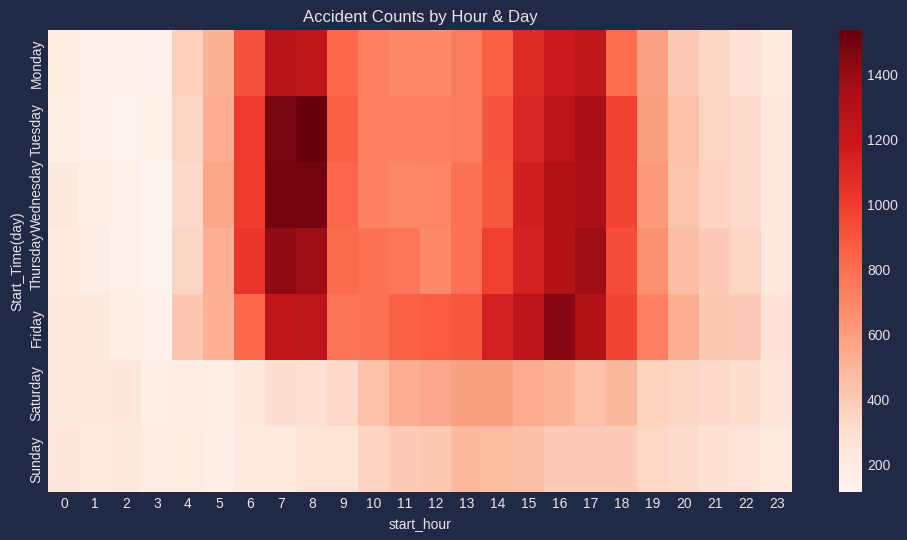

In [42]:
heatmap_data = data.groupby(['Start_Time(day)', 'start_hour']).size().reset_index(name='count')
heatmap_pivot = heatmap_data.pivot(index='Start_Time(day)', columns='start_hour', values='count').reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_pivot, cmap="Reds")
plt.title("Accident Counts by Hour & Day")
plt.show()

### Severity distribution 

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


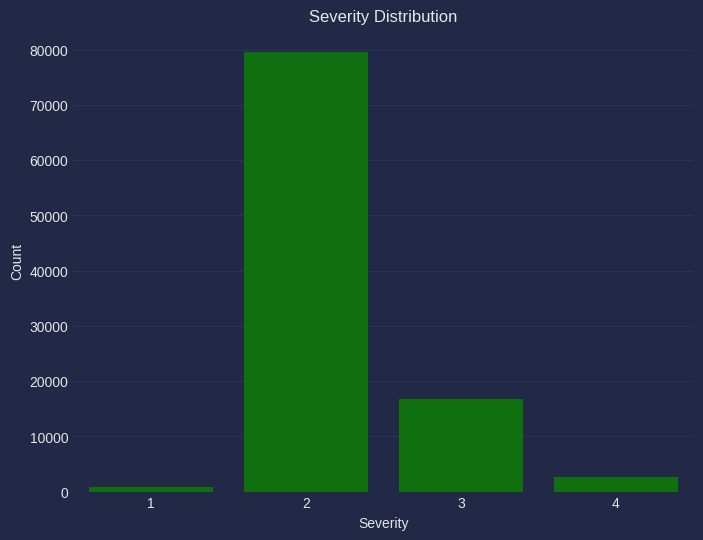

In [43]:
severity_counts = data['Severity'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=severity_counts.index, y=severity_counts.values, color='green')
plt.title("Severity Distribution")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


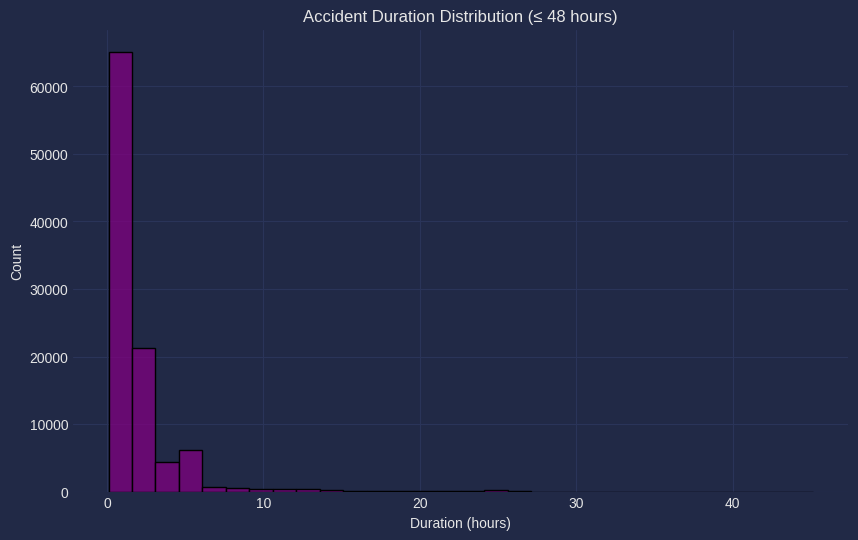

In [44]:
# accident duration (less than two days)
data_hour = data[(data['Accident_Duration(hr)'] >= 0) & (data['Accident_Duration(hr)'] <= 48)]
plt.figure(figsize=(10, 6))
sns.histplot(data_hour['Accident_Duration(hr)'], bins=30, color='purple')
plt.title("Accident Duration Distribution (≤ 48 hours)")
plt.xlabel("Duration (hours)")
plt.show()

### Accident duration

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


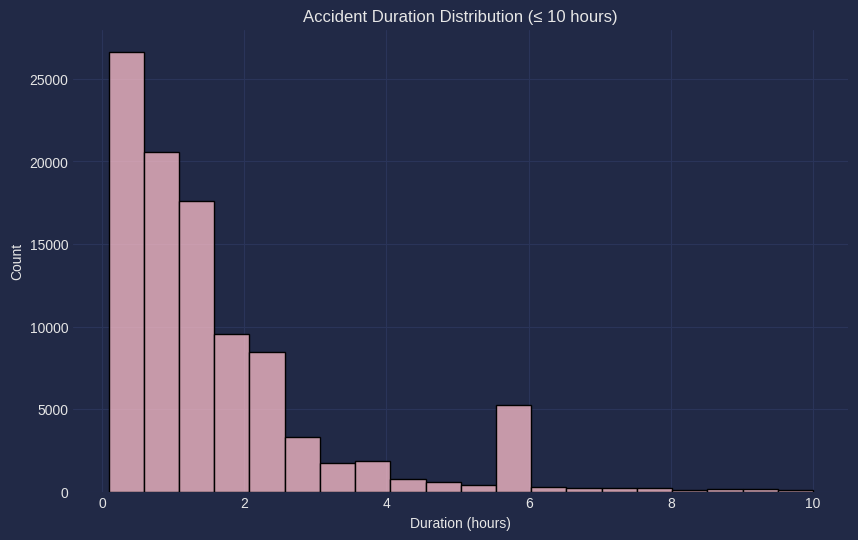

In [45]:
# duration that take from 0-10 hours 
filtered = data[data['Accident_Duration(hr)'] <= 10]
plt.figure(figsize=(10, 6))
sns.histplot(filtered['Accident_Duration(hr)'], bins=20, color='pink')
plt.title("Accident Duration Distribution (≤ 10 hours)")
plt.xlabel("Duration (hours)")
plt.show()

In [46]:
data['Severity'].unique()

[1, 2, 3, 4]
Categories (4, int64): [1 < 2 < 3 < 4]

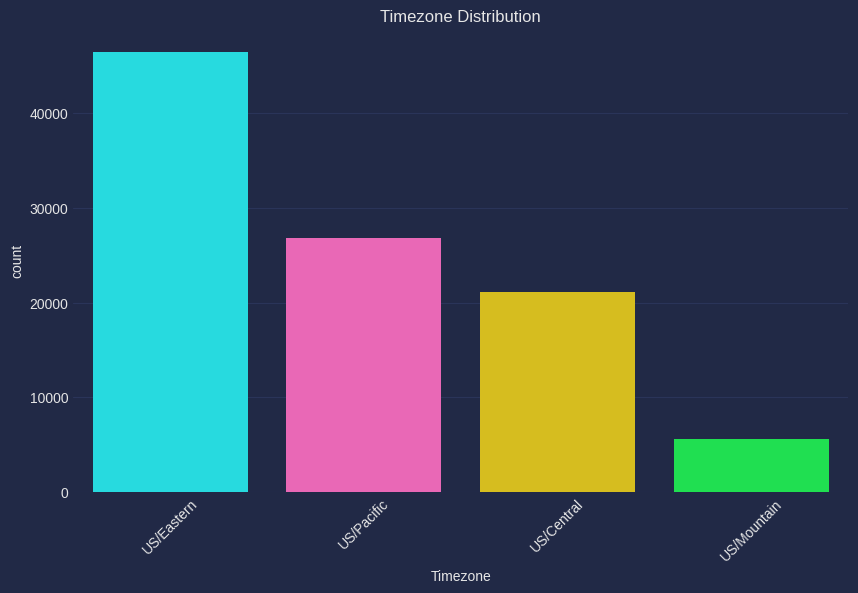

In [47]:
# timezone counts  
timezone_counts = data['Timezone'].value_counts().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(data=timezone_counts, x='Timezone', y='count')
plt.title("Timezone Distribution")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_19/1216622334.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_source = data.groupby(['Severity', 'Source']).size().reset_index(name="count")


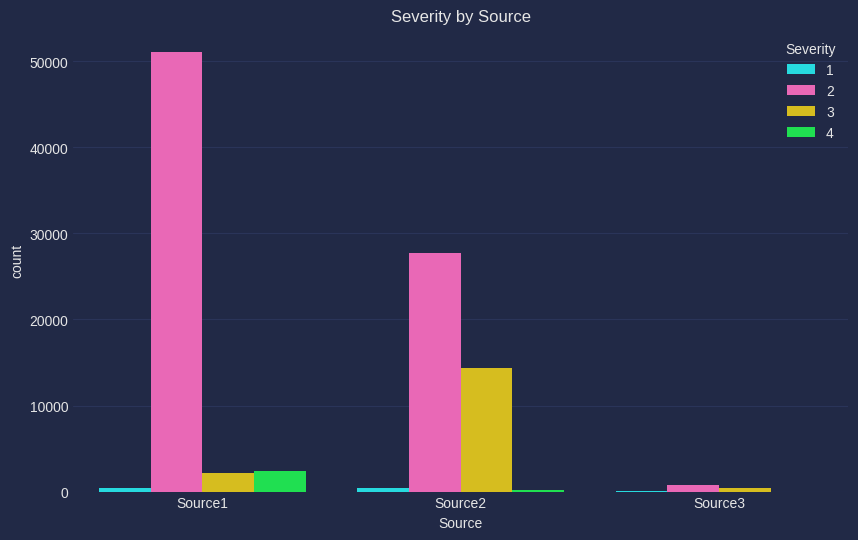

In [48]:
severity_source = data.groupby(['Severity', 'Source']).size().reset_index(name="count")
plt.figure(figsize=(10, 6))
sns.barplot(data=severity_source, x='Source', y='count', hue='Severity')
plt.title("Severity by Source")
plt.show()

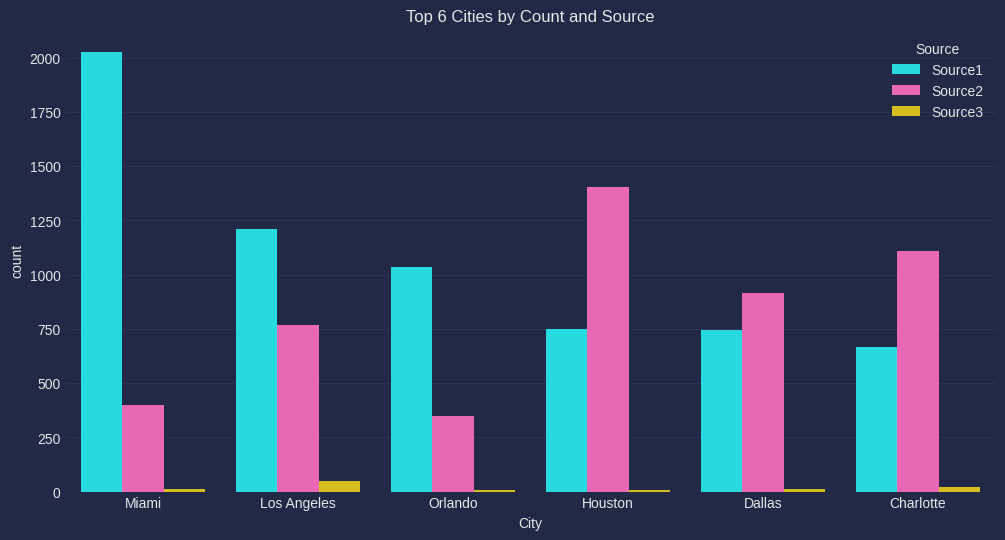

In [49]:
city5 = data.groupby('Source')['City'].value_counts().reset_index(name='count')
top_cities = city5.groupby('City')['count'].sum().nlargest(6).index
city5 = city5[city5['City'].isin(top_cities)]
plt.figure(figsize=(12, 6))
sns.barplot(data=city5, x='City', y='count', hue='Source')
plt.title("Top 6 Cities by Count and Source")
plt.show()

/tmp/ipykernel_19/1481491616.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_severity = data.groupby(['State', 'Severity']).size().reset_index(name='count')


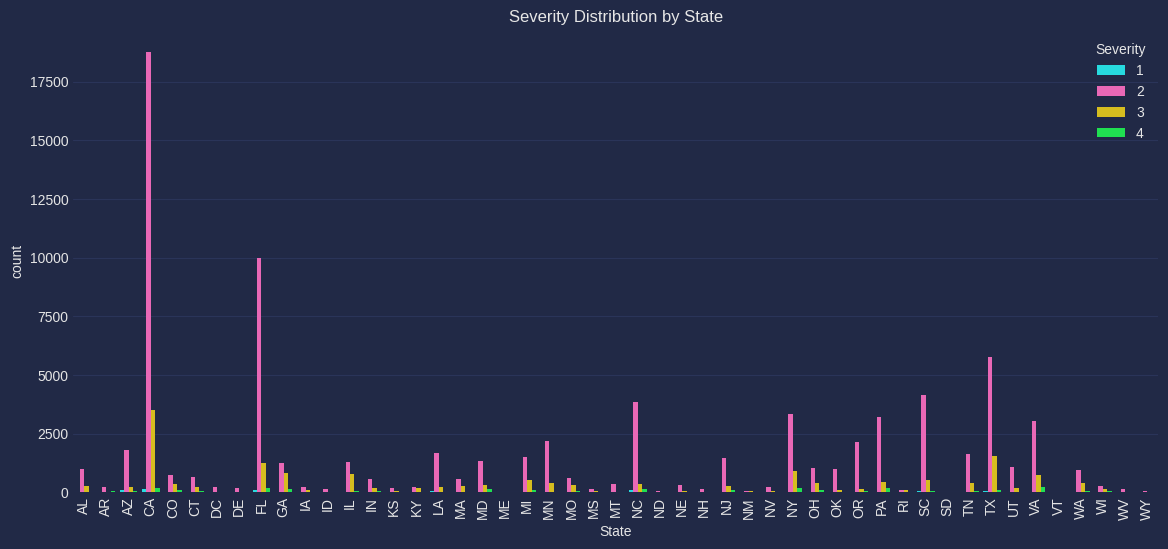

In [50]:
# aveage severity by state
state_severity = data.groupby(['State', 'Severity']).size().reset_index(name='count')
plt.figure(figsize=(14, 6))
sns.barplot(data=state_severity, x='State', y='count', hue="Severity")
plt.title("Severity Distribution by State")
plt.xticks(rotation=90)
plt.show()

# Ali

### Wind direction

Text(0, 0.5, 'Number of Accidents')

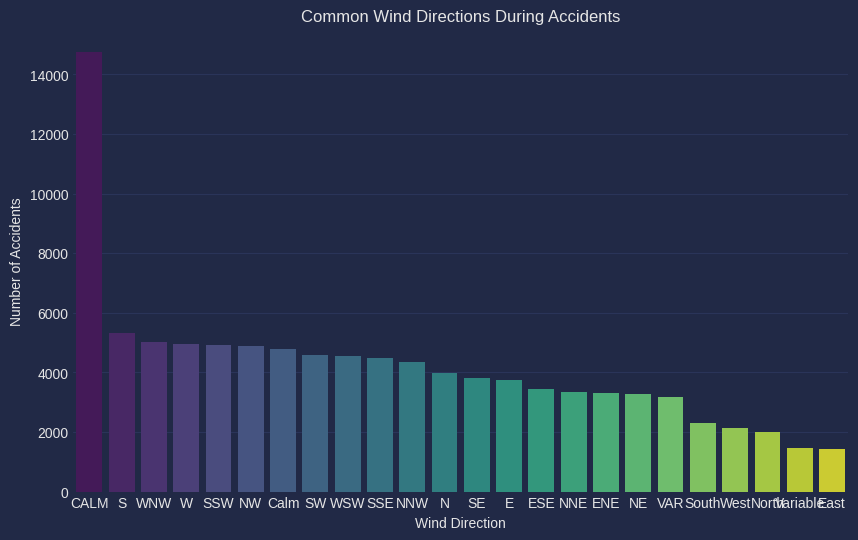

In [51]:
wind_counts = data['Wind_Direction'].value_counts().reset_index()
wind_counts.columns = ['Wind_Direction', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(
    data=wind_counts,
    x='Wind_Direction',
    y='Count',
    palette='viridis'
)

plt.title('Common Wind Directions During Accidents')
plt.xlabel('Wind Direction')
plt.ylabel('Number of Accidents')

Text(0, 0.5, 'City')

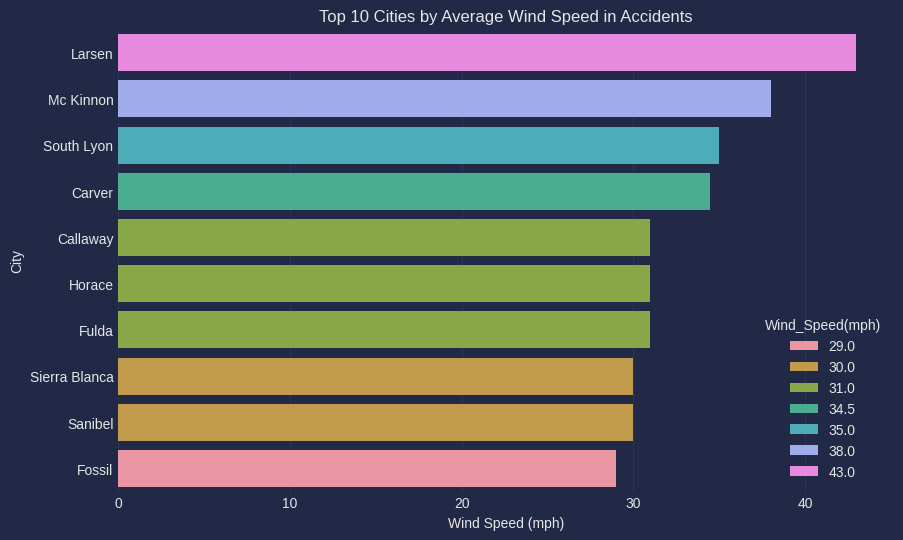

In [52]:
city_wind = data.groupby('City')['Wind_Speed(mph)'].mean().reset_index()
top_10_city_wind = city_wind.sort_values('Wind_Speed(mph)' ,ascending = False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_city_wind,
    x='Wind_Speed(mph)',
    y='City',
    hue='Wind_Speed(mph)',
    dodge=False
)
plt.title('Top 10 Cities by Average Wind Speed in Accidents')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('City')

### Humidity vs Pressure

Text(0, 0.5, 'Pressure(in)')

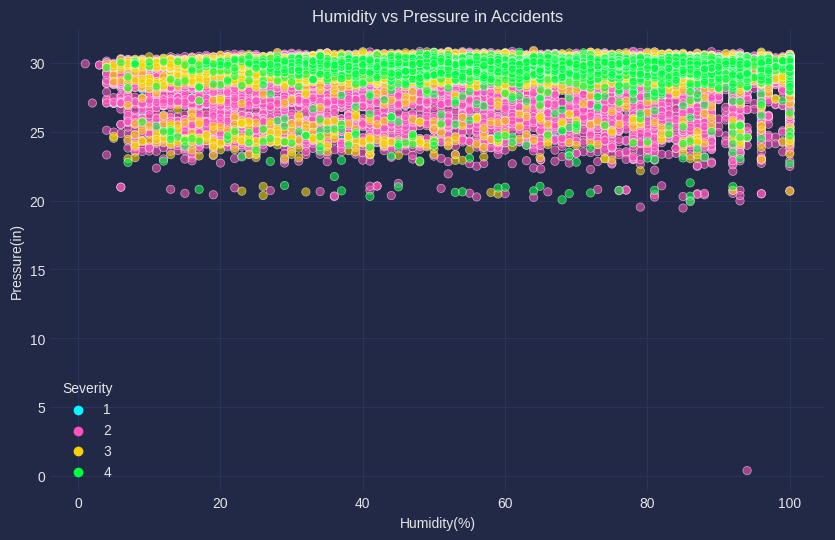

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='Humidity(%)',
    y='Pressure(in)',
    hue='Severity',
    alpha=0.6
)
plt.title('Humidity vs Pressure in Accidents')
plt.xlabel('Humidity(%)')
plt.ylabel('Pressure(in)')

### Correlations between Temperature(F) ,Wind_Speed(mph) ,Pressure(in) & Humidity(%)

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Text(100.58333333333333, 0.5, 'Weather Factors')

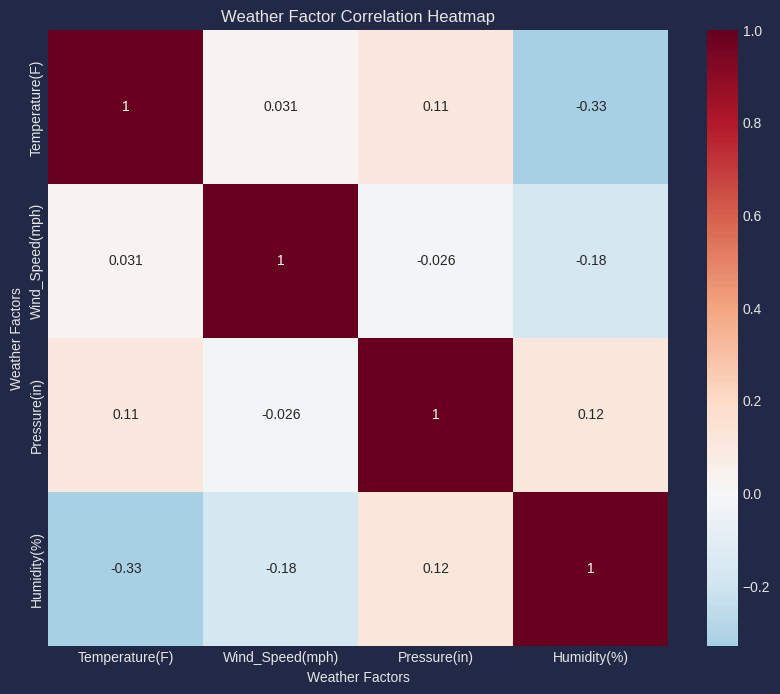

In [54]:
cols = ['Temperature(F)', 'Wind_Speed(mph)', 'Pressure(in)', 'Humidity(%)']
corr_matrix = data[cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='RdBu_r',
    center=0
)
plt.title('Weather Factor Correlation Heatmap')
plt.xlabel('Weather Factors')
plt.ylabel('Weather Factors')

In [55]:
! pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 57.3 MB/s eta 0:00:00


### Temperature

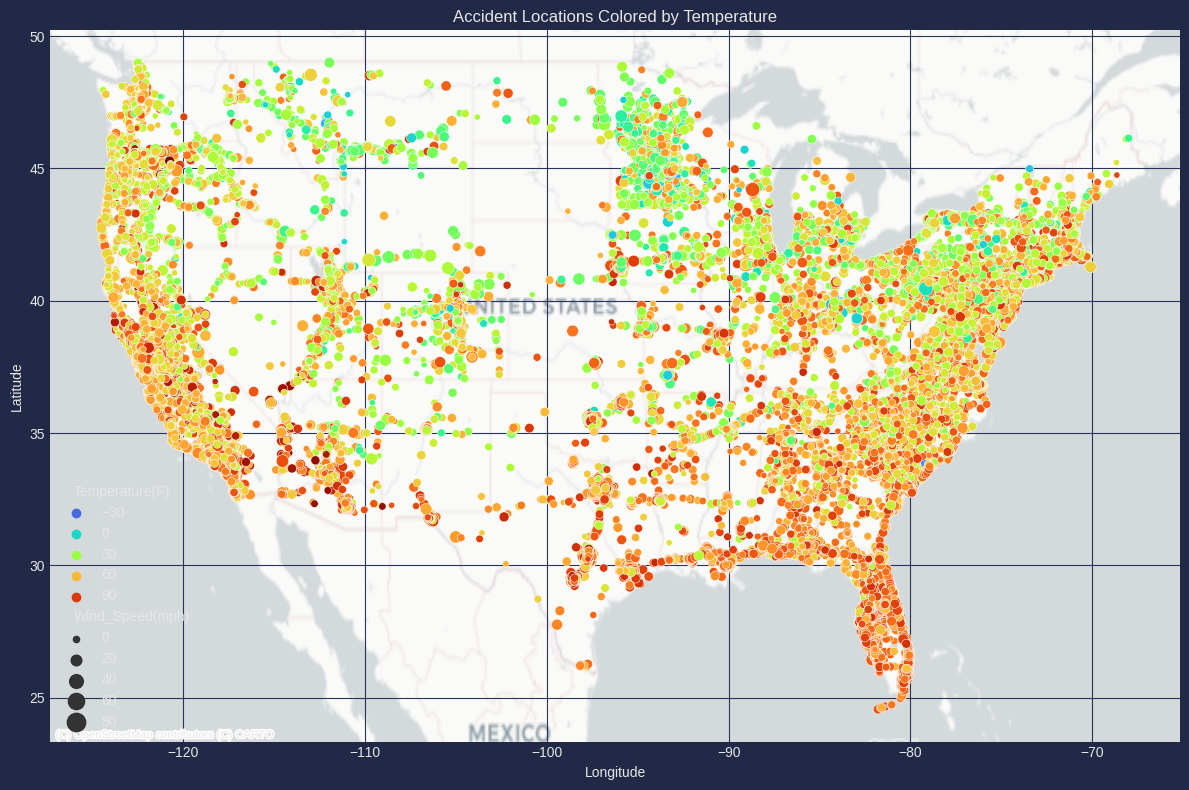

In [56]:
import contextily as ctx

fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(
    data=data,
    x="Start_Lng",
    y="Start_Lat",
    hue="Temperature(F)",
    size="Wind_Speed(mph)",
    sizes=(20, 200),
    palette="turbo",
    ax=ax
)

ctx.add_basemap(
    ax,
    crs="EPSG:4326",
    source=ctx.providers.CartoDB.Positron
)

ax.set_title("Accident Locations Colored by Temperature")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Number of Accidents')

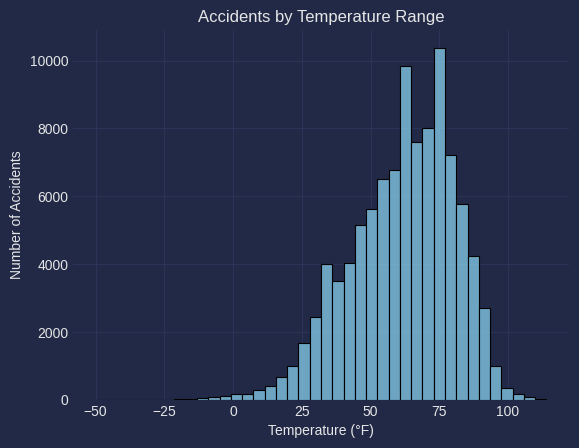

In [57]:
sns.histplot(
    data=data,
    x="Temperature(F)",
    bins=40,
    kde=False,  
    color="skyblue"
)
plt.title("Accidents by Temperature Range")
plt.xlabel("Temperature (°F)")
plt.ylabel("Number of Accidents")

### Wind Speed

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Number of Accidents')

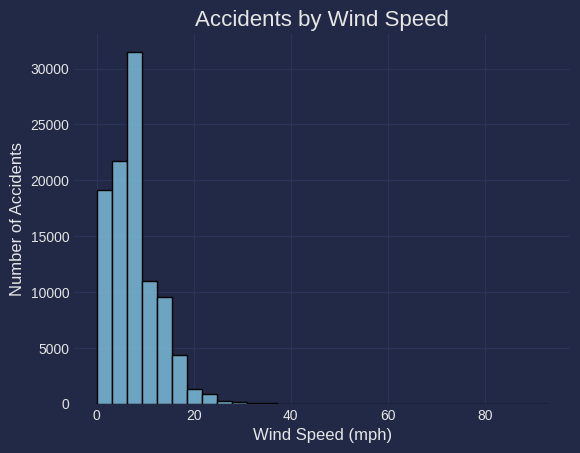

In [58]:
sns.histplot(
    data=data,
    x="Wind_Speed(mph)",
    bins=30, 
    color="skyblue",
    edgecolor="black"
)

plt.title("Accidents by Wind Speed", fontsize=16)
plt.xlabel("Wind Speed (mph)", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)

# Nour

In [59]:
import plotly.express as px

### Civil_Twilight

In [60]:
no_of_acc_due_to_Civil_Twilight = data['Civil_Twilight'].value_counts().reset_index()
no_of_acc_due_to_Civil_Twilight
no_of_acc_due_to_Civil_Twilight.columns = ['Civil_Twilight', 'Count']
no_of_acc_due_to_Civil_Twilight ['Percentage'] = (no_of_acc_due_to_Civil_Twilight ['Count'] /no_of_acc_due_to_Civil_Twilight ['Count'].sum())  *100
no_of_acc_due_to_Civil_Twilight

# no of accident in the day is more very much 73.92% as in night is 26.08% maybe beacuse the Traffic congestion due to work or other reasons, as people are sleeping at night.

Civil_Twilight  Count  Percentage
0            Day  73760   73.761475
1          Night  26238   26.238525

In [61]:
px.pie(no_of_acc_due_to_Civil_Twilight , values='Count' , names = 'Civil_Twilight', color_discrete_sequence = px.colors.sequential.RdBu)

### Sunrise_Sunset

In [62]:
no_of_acc_due_to_Sunrise_Sunset = data['Sunrise_Sunset'].value_counts().reset_index()
no_of_acc_due_to_Sunrise_Sunset.columns = ['Sunrise_Sunset','Count']
no_of_acc_due_to_Sunrise_Sunset['Percentage'] = (no_of_acc_due_to_Sunrise_Sunset['Count']/no_of_acc_due_to_Sunrise_Sunset['Count'].sum())*100
no_of_acc_due_to_Sunrise_Sunset

# no of accident in the day is more very much 69.23% as in night is 30.07% maybe beacuse the Traffic congestion due to work or other reasons, as people are sleeping at night.

Sunrise_Sunset  Count  Percentage
0            Day  69018    69.01938
1          Night  30980    30.98062

In [63]:
fig = px.pie(no_of_acc_due_to_Sunrise_Sunset, values='Count',names='Sunrise_Sunset' , color_discrete_sequence = px.colors.sequential.RdBu)
fig.show()

### Visibility(mi)

In [64]:
Values_Of_Visibility = data['Visibility(mi)'].value_counts().reset_index()
Values_Of_Visibility
Values_Of_Visibility.columns = ['Visibility(mi)','Count']
Values_Of_Visibility['Percentage'] = (Values_Of_Visibility['Count']/Values_Of_Visibility['Count'].sum())*100
Values_Of_Visibility

#As we can see wheb the value of visibility is low the accident is more to be happen up to nearby 80% compare to loe vaules of visibility it nearby 0%

Visibility(mi)  Count  Percentage
0        10.000000  78643   78.644573
1         7.000000   2787    2.787056
2         9.000000   2385    2.385048
3         9.095003   2257    2.257045
4         8.000000   1984    1.984040
5         5.000000   1825    1.825037
6         2.000000   1589    1.589032
7         6.000000   1571    1.571031
8         4.000000   1548    1.548031
9         3.000000   1526    1.526031
10        1.000000   1308    1.308026
11        0.500000    485    0.485010
12        0.250000    373    0.373007
13        0.750000    305    0.305006
14        2.500000    241    0.241005
15        1.500000    159    0.159003
16        0.200000    151    0.151003
17       13.000000    124    0.124002
18        1.800000    109    0.109002
19        0.000000    106    0.106002
20        0.800000    100    0.100002
21       15.000000     87    0.087002
22        1.200000     69    0.069001
23       20.000000     57    0.057001
24       50.000000     36    0.036001
25        0.120000     33    0.033001
26       30.000000     28    0.028001
27       40.000000     27    0.027001
28       25.000000     16    0.016000
29        0.100000     15    0.015000
30       80.000000      9    0.009000
31        0.060000      9    0.009000
32       70.000000      7    0.007000
33        0.630000      3    0.003000
34       12.000000      3    0.003000
35       45.000000      3    0.003000
36       60.000000      3    0.003000
37        0.880000      3    0.003000
38       11.000000      3    0.003000
39        1.900000      2    0.002000
40       10.500000      2    0.002000
41      100.000000      1    0.001000
42        1.400000      1    0.001000
43       90.000000      1    0.001000
44        0.400000      1    0.001000
45        1.100000      1    0.001000
46        2.800000      1    0.001000
47       75.000000      1    0.001000

In [65]:
groubed = data.groupby(['Civil_Twilight','Sunrise_Sunset'])['Visibility(mi)'].describe()
groubed

count      mean       std  min        25%  \
Civil_Twilight Sunrise_Sunset                                                
Day            Day             69018.0  9.192336  2.793129  0.0  10.000000   
               Night            4742.0  8.888957  3.005612  0.0   9.095003   
Night          Night           26238.0  8.876213  2.537334  0.0  10.000000   

                                50%   75%    max  
Civil_Twilight Sunrise_Sunset                     
Day            Day             10.0  10.0  100.0  
               Night           10.0  10.0   70.0  
Night          Night           10.0  10.0   50.0

In [66]:
av_groubed = data.groupby(['Civil_Twilight','Sunrise_Sunset'])['Visibility(mi)'].mean().reset_index()
av_groubed

Civil_Twilight Sunrise_Sunset  Visibility(mi)
0            Day            Day        9.192336
1            Day          Night        8.888957
2          Night          Night        8.876213

### Relation between Visibility & Sunrise_Sunset & Civil_twilight

In [67]:
#this show no direct relation between Visibility & Sunrise_Sunset & Civil_twilight 
fig = px.bar(
    av_groubed,
    x='Civil_Twilight',
    y='Visibility(mi)',
    color='Sunrise_Sunset',
    barmode='group',
    title='متوسط الرؤية (Visibility) حسب Civil Twilight و Sunrise/Sunset',
    labels={'Civil_Twilight': 'Civil Twilight', 'Visibility(mi)': 'Visibility Average', 'Sunrise_Sunset': 'Sunrise/Sunset'}
)
fig.show()

### Airport_Code

In [68]:
no_Of_airport_near_to_acc = data['Airport_Code'].value_counts().reset_index()
no_Of_airport_near_to_acc
no_Of_airport_near_to_acc.columns = ['Airport_Code' , 'Count']
no_Of_airport_near_to_acc

Airport_Code  Count
0            KCQT   1846
1            KRDU   1431
2            KMCJ   1301
3            KCLT   1274
4            KBNA   1215
...           ...    ...
1610         KACB      1
1611         KUNU      1
1612         K5T6      1
1613         KEFT      1
1614         KW99      1

[1615 rows x 2 columns]

In [69]:
fig = px.bar(no_Of_airport_near_to_acc.head(10), x='Airport_Code', y='Count')
fig.show()

     Airport_Code  Count
0            KCQT   1846
1            KRDU   1431
2            KMCJ   1301
3            KCLT   1274
4            KBNA   1215
...           ...    ...
1610         KACB      1
1611         KUNU      1
1612         K5T6      1
1613         KEFT      1
1614         KW99      1

[1615 rows x 2 columns]


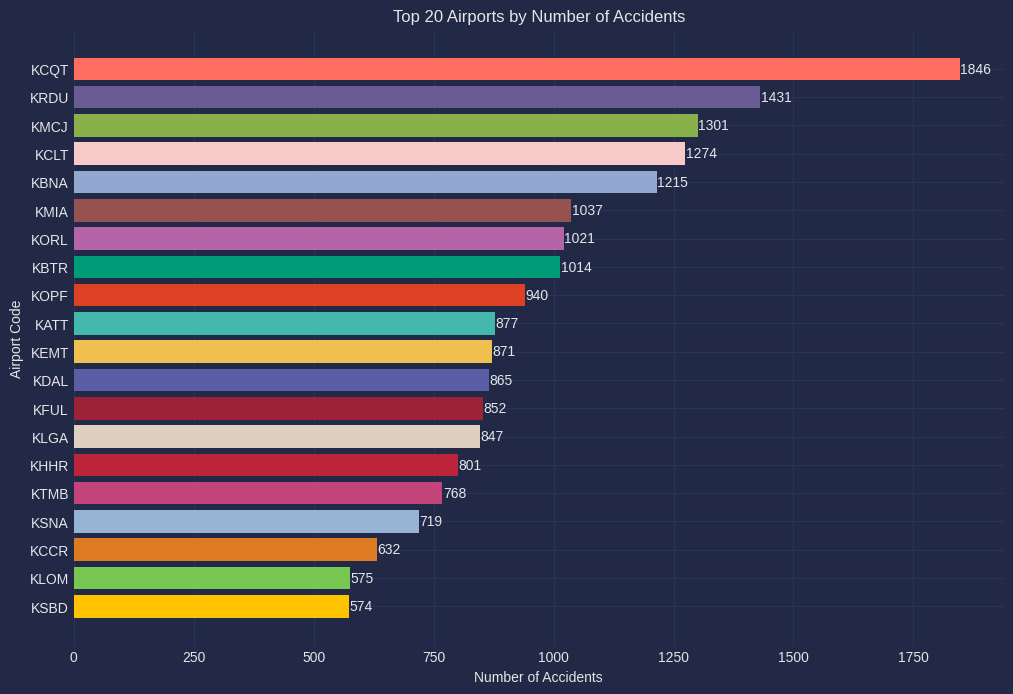

In [70]:
# حساب عدد الحوادث لكل مطار مع تسمية العمود مباشرة
no_Of_airport_near_to_acc = data['Airport_Code'].value_counts().reset_index(name='Count')
# إعادة تسمية العمود الأول
no_Of_airport_near_to_acc.rename(columns={'index': 'Airport_Code'}, inplace=True)
# عرض النتيجة
print(no_Of_airport_near_to_acc)
import matplotlib.pyplot as plt


# ترتيب الحوادث تنازليًا وأخذ أول 20
top20_airports = no_Of_airport_near_to_acc.sort_values(by='Count', ascending=False).head(20)

# قائمة الألوان
colors = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1",
          "#955251", "#B565A7", "#009B77", "#DD4124", "#45B8AC",
          "#EFC050", "#5B5EA6", "#9B2335", "#DFCFBE", "#BC243C",
          "#C3447A", "#98B4D4", "#DE7A22", "#79C753", "#FFC300"]

plt.figure(figsize=(12,8))
plt.barh(top20_airports['Airport_Code'], top20_airports['Count'], color=colors)
plt.xlabel('Number of Accidents')
plt.ylabel('Airport Code')
plt.title('Top 20 Airports by Number of Accidents')
plt.gca().invert_yaxis()  # Highest value on top

# إضافة الأرقام بجانب الأعمدة
for index, value in enumerate(top20_airports['Count']):
    plt.text(value + 1, index, str(value), va='center')

plt.show()

### Traffic_Signal

In [71]:
no_of_acc_with_and_without_TS = data['Traffic_Signal'].value_counts().reset_index()
no_of_acc_with_and_without_TS
no_of_acc_with_and_without_TS.columns = ['Traffic_Signal','Count']
no_of_acc_with_and_without_TS['Perfect'] = (no_of_acc_with_and_without_TS['Count'] / no_of_acc_with_and_without_TS['Count'].sum())*100
no_of_acc_with_and_without_TS

#As we show Accidents In region with no Traffic lights is very high nearby 85%

Traffic_Signal  Count    Perfect
0           False  85306  85.307706
1            True  14692  14.692294

In [72]:
fig = px.pie(no_of_acc_with_and_without_TS,values='Count' , names='Traffic_Signal',color_discrete_sequence = px.colors.sequential.RdBu)
fig.show()

### Crossing

In [73]:
no_of_acc_due_to_Crossing = data['Crossing'].value_counts().reset_index()
no_of_acc_due_to_Crossing
no_of_acc_due_to_Crossing.columns = ['Crossing' ,'Count']
no_of_acc_due_to_Crossing['Percentage'] = (no_of_acc_due_to_Crossing['Count']/no_of_acc_due_to_Crossing['Count'].sum())*100
no_of_acc_due_to_Crossing

#no of accident increase with no crossing region

Crossing  Count  Percentage
0     False  88830   88.831777
1      True  11168   11.168223

In [74]:
fig = px.pie(no_of_acc_due_to_Crossing,values='Count' , names='Crossing',color_discrete_sequence = px.colors.sequential.RdBu)
fig.show()

### Street

In [75]:
no_of_acc_of_streets = data['Street'].value_counts().reset_index()
no_of_acc_of_streets
no_of_acc_of_streets.columns = ['Street' , 'Count']
no_of_acc_of_streets['Percentage'] = (no_of_acc_of_streets['Count'] / no_of_acc_of_streets['Count'].sum()) *100
no_of_acc_of_streets

#I-95 N is the most

Street  Count  Percentage
0                  I-95 N   1206    1.206024
1                  I-95 S    978    0.978020
2                   I-5 N    921    0.921018
3                  I-10 E    733    0.733015
4                   I-5 S    681    0.681014
...                   ...    ...         ...
32287        E Euclid Ave      1    0.001000
32288        Yorktown Ave      1    0.001000
32289   Calvary Church Rd      1    0.001000
32290     Governors Dr SE      1    0.001000
32291          Johnson Dr      1    0.001000

[32292 rows x 3 columns]

In [76]:
fig = px.bar(no_of_acc_of_streets.head(10), x='Street', y='Count')
fig.show()

### Distance(mi)

In [77]:
Walks = data['Distance(mi)'].value_counts().reset_index()
Walks
Walks.columns = ['Distance(mi)' , 'Count']
Walks['Percentage'] = (Walks['Count'] / Walks['Count'].sum()) *100
Walks

#most accident occures in the begin of the street

Distance(mi)  Count  Percentage
0            0.000  42602   42.602852
1            0.010   3359    3.359067
2            0.008    210    0.210004
3            0.009    197    0.197004
4            0.010    181    0.181004
...            ...    ...         ...
6176         6.250      1    0.001000
6177         4.901      1    0.001000
6178         3.252      1    0.001000
6179         2.795      1    0.001000
6180         2.880      1    0.001000

[6181 rows x 3 columns]

In [78]:
fig = px.line(Walks , x='Distance(mi)' , y='Percentage', title='Percentage of Accidents by Visibility', markers=True)
fig.show()

###### Relation between Distance(mi) & Street & Crossing & Traffic_Signal

In [79]:
result = data.groupby(['Street', 'Crossing', 'Traffic_Signal'])['Distance(mi)'].describe()
result

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



count      mean       std    min  \
Street       Crossing Traffic_Signal                                     
 102nd Ave   True     True              1.0  0.009000       NaN  0.009   
 105th St E  False    False             1.0  0.500000       NaN  0.500   
 105th St NE False    False             1.0  0.323000       NaN  0.323   
 10th Ave    False    False             3.0  1.904667  2.473192  0.116   
             True     False             1.0  0.227000       NaN  0.227   
...                                     ...       ...       ...    ...   
Zoo Rd       False    False             1.0  0.000000       NaN  0.000   
Zorn Ave     False    False             2.0  0.000000  0.000000  0.000   
Zumbehl Rd   False    False             1.0  0.012000       NaN  0.012   
Zuni Rd SE   False    True              1.0  0.000000       NaN  0.000   
Zuni St      True     True              1.0  0.000000       NaN  0.000   

                                         25%    50%    75%    max  
Street       Crossing Traffic_Signal                               
 102nd Ave   True     True            0.0090  0.009  0.009  0.009  
 105th St E  False    False           0.5000  0.500  0.500  0.500  
 105th St NE False    False           0.3230  0.323  0.323  0.323  
 10th Ave    False    False           0.4935  0.871  2.799  4.727  
             True     False           0.2270  0.227  0.227  0.227  
...                                      ...    ...    ...    ...  
Zoo Rd       False    False           0.0000  0.000  0.000  0.000  
Zorn Ave     False    False           0.0000  0.000  0.000  0.000  
Zumbehl Rd   False    False           0.0120  0.012  0.012  0.012  
Zuni Rd SE   False    True            0.0000  0.000  0.000  0.000  
Zuni St      True     True            0.0000  0.000  0.000  0.000  

[38403 rows x 8 columns]

In [80]:
result = data.groupby(['Street', 'Crossing', 'Traffic_Signal'])['Distance(mi)'].mean().reset_index()
result

Street  Crossing  Traffic_Signal  Distance(mi)
0         102nd Ave      True            True      0.009000
1        105th St E     False           False      0.500000
2       105th St NE     False           False      0.323000
3          10th Ave     False           False      1.904667
4          10th Ave      True           False      0.227000
...             ...       ...             ...           ...
38398        Zoo Rd     False           False      0.000000
38399      Zorn Ave     False           False      0.000000
38400    Zumbehl Rd     False           False      0.012000
38401    Zuni Rd SE     False            True      0.000000
38402       Zuni St      True            True      0.000000

[38403 rows x 4 columns]

### Civil_Twilight

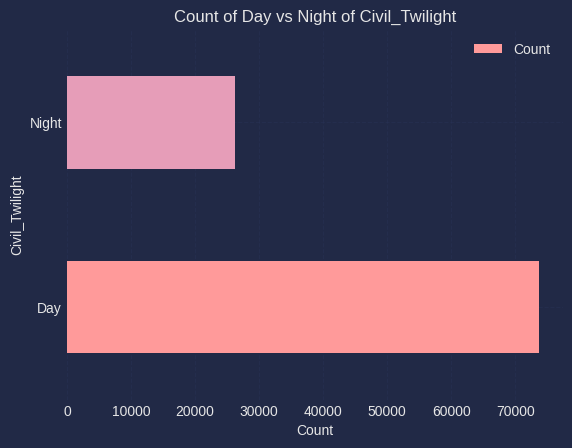

In [81]:
no_of_acc_due_to_Civil_Twilight = data['Civil_Twilight'].value_counts().reset_index()
no_of_acc_due_to_Civil_Twilight
no_of_acc_due_to_Civil_Twilight.columns = ['Civil_Twilight', 'Count']
no_of_acc_due_to_Civil_Twilight ['Percentage'] = (no_of_acc_due_to_Civil_Twilight ['Count'] /no_of_acc_due_to_Civil_Twilight ['Count'].sum())  *100
no_of_acc_due_to_Civil_Twilight

# no of accident in the day is more very much 73.92% as in night is 26.08% maybe beacuse the Traffic congestion due to work or other reasons, as people are sleeping at night.
#Drawing
import matplotlib.pyplot as plt
no_of_acc_due_to_Civil_Twilight.plot( x='Civil_Twilight' , y='Count', kind = 'barh' , color=['#FF9A9A','#E69DB8'])
plt.xlabel('Count')
plt.ylabel('Civil_Twilight')
plt.title('Count of Day vs Night of Civil_Twilight')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

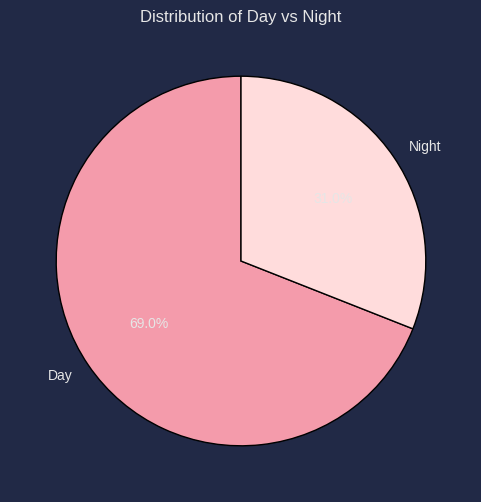

In [82]:
no_of_acc_due_to_Sunrise_Sunset = data['Sunrise_Sunset'].value_counts().reset_index()
no_of_acc_due_to_Sunrise_Sunset
no_of_acc_due_to_Sunrise_Sunset.columns = ['Sunrise_Sunset','Count']
no_of_acc_due_to_Sunrise_Sunset['Percentage'] = (no_of_acc_due_to_Sunrise_Sunset['Count']/no_of_acc_due_to_Sunrise_Sunset['Count'].sum())*100
no_of_acc_due_to_Sunrise_Sunset

# no of accident in the day is more very much 69.23% as in night is 30.07% maybe beacuse the Traffic congestion due to work or other reasons, as people are sleeping at night.
#Drawing 
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.pie( no_of_acc_due_to_Sunrise_Sunset['Count'] ,
        labels= no_of_acc_due_to_Sunrise_Sunset['Sunrise_Sunset'],
        autopct='%1.1f%%',       # عرض النسبة المئوية
        colors=['#F49BAB', '#FFDCDC'],
        startangle=90,           # يبدأ من الأعلى
        wedgeprops={'edgecolor': 'black'}  # حدود سوداء للفواصل
       )
plt.title('Distribution of Day vs Night')
plt.show()

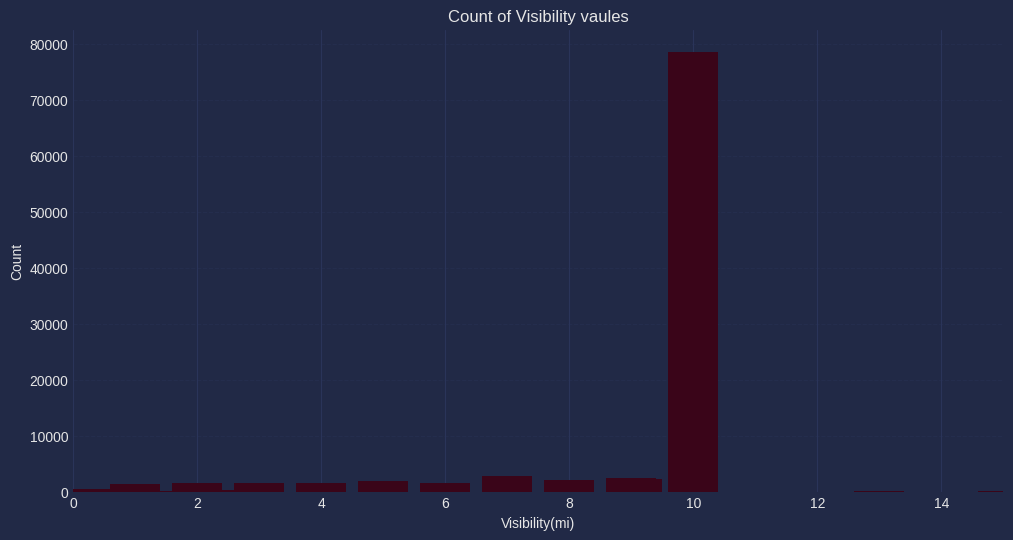

In [83]:
Values_Of_Visibility = data['Visibility(mi)'].value_counts().reset_index()
Values_Of_Visibility
Values_Of_Visibility.columns = ['Visibility(mi)','Count']
Values_Of_Visibility['Percentage'] = (Values_Of_Visibility['Count']/Values_Of_Visibility['Count'].sum())*100
Values_Of_Visibility

#As we can see when the value of visibility is low the accident is more to be happen up to nearby 80% compare to low vaules of visibility it nearby 0%
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.bar(
    Values_Of_Visibility['Visibility(mi)'],
    Values_Of_Visibility['Count'],
    color=['#3A0519'],
    width=0.8  # أقل من 1 يخلي فيه مسافة
)
plt.xlabel('Visibility(mi)')
plt.ylabel('Count')
plt.title('Count of Visibility vaules')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.xlim(0, 15)  # من 0 لحد 15
plt.show()

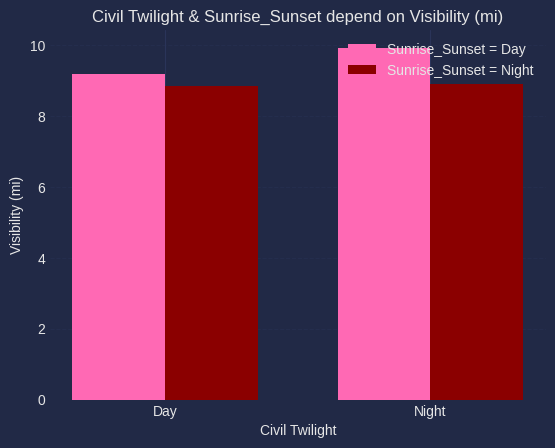

In [84]:
groubed = data.groupby(['Civil_Twilight','Sunrise_Sunset'])['Visibility(mi)'].describe()
groubed
av_groubed = data.groupby(['Civil_Twilight','Sunrise_Sunset'])['Visibility(mi)'].mean().reset_index()
av_groubed

#this show no direct relation between Visibility & Sunrise_Sunset & Civil_twilight 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# البيانات
df = pd.DataFrame({
    'Civil_Twilight': ['Day', 'Day', 'Night', 'Night'],
    'Sunrise_Sunset': ['Day', 'Night', 'Day', 'Night'],
    'Visibility(mi)': [9.177605, 8.853732, 9.924051, 8.901625]
})

# إنشاء مواقع الأعمدة
x = np.arange(len(df['Civil_Twilight'].unique()))  # عدد المجموعات = 2 (Day, Night)
width = 0.35  # عرض العمود

# تقسيم البيانات على حسب Sunrise_Sunset
day_data = df[df['Sunrise_Sunset'] == 'Day']['Visibility(mi)']
night_data = df[df['Sunrise_Sunset'] == 'Night']['Visibility(mi)']

# رسم الأعمدة
fig, ax = plt.subplots()
ax.bar(x - width/2, day_data, width, label='Sunrise_Sunset = Day', color='hotpink')
ax.bar(x + width/2, night_data, width, label='Sunrise_Sunset = Night', color='darkred')

# العناوين والتنسيق
ax.set_xlabel('Civil Twilight')
ax.set_ylabel('Visibility (mi)')
ax.set_title('Civil Twilight & Sunrise_Sunset depend on Visibility (mi)')
ax.set_xticks(x)
ax.set_xticklabels(df['Civil_Twilight'].unique())
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()

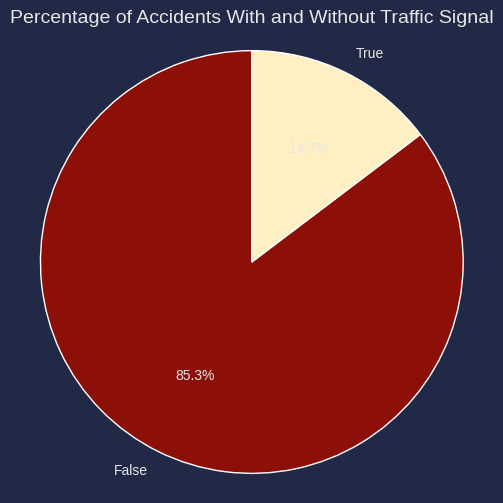

In [85]:
no_of_acc_with_and_without_TS = data['Traffic_Signal'].value_counts().reset_index()
no_of_acc_with_and_without_TS
no_of_acc_with_and_without_TS.columns = ['Traffic_Signal','Count']
no_of_acc_with_and_without_TS['Perfect'] = (no_of_acc_with_and_without_TS['Count'] / no_of_acc_with_and_without_TS['Count'].sum())*100
no_of_acc_with_and_without_TS

#As we show Accidents In region with no Traffic lights is very high nearby 85%
import matplotlib.pyplot as plt

# بيانات الرسم
labels = no_of_acc_with_and_without_TS['Traffic_Signal']
sizes = no_of_acc_with_and_without_TS['Perfect']

# ألوان جذابة (2 بس لأن عندك حالتين)
colors = ['#8C1007', '#FFF0C4']

# رسم المخطط الدائري
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Percentage of Accidents With and Without Traffic Signal', fontsize=14)
plt.axis('equal')  # عشان الدايرة تكون مظبوطة
plt.show()

### Distance(mi)

In [86]:
most_repeated_dis = data["Distance(mi)"].value_counts()
most_repeated_dis

Distance(mi)
0.000    42602
0.010     3359
0.008      210
0.009      197
0.010      181
         ...  
6.250        1
4.901        1
3.252        1
2.795        1
2.880        1
Name: count, Length: 6181, dtype: int64

In [87]:
print(data.groupby("Severity")["Distance(mi)"].mean(), "\n")#نقسم البيانات حسب متوايات الحوداث المختلفة وكل مستوي حسبت ال متوسط
Q1 = data["Distance(mi)"].quantile(0.25)
Q3 = data["Distance(mi)"].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data["Distance(mi)"] < Q1 - 1.5 * IQR) | (data["Distance(mi)"] > Q3 + 1.5 * IQR)]
print(len(outliers)) #no of rows have outliers

Severity
1    0.087529
2    0.562680
3    0.437746
4    1.517913
Name: Distance(mi), dtype: float64 

12423


/tmp/ipykernel_19/4144017192.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [88]:
# 1. Histogram لتوزيع Distance(mi)
fig1 = px.histogram(data, x="Distance(mi)", nbins=10, title="Distribution of Distance(mi)")
fig1.show()

# 2. Boxplot يظهر التوزيع والشواذ لكل الحوادث
fig2 = px.box(data, y="Distance(mi)", title="Boxplot of Distance(mi) to detect Outliers")
fig2.show()

# 3. Bar plot لمتوسط Distance(mi) لكل شدة حادث (Severity)
avg_distance = data.groupby("Severity")["Distance(mi)"].mean().reset_index()
fig3 = px.bar(avg_distance, x="Severity", y="Distance(mi)", 
              title="Average Distance(mi) by Severity",
              labels={"Distance(mi)": "Average Distance (miles)"})
fig3.show()

/tmp/ipykernel_19/18865920.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# Kirellos

### Source

<Axes: title={'center': 'Sources Percentages'}, ylabel='count'>

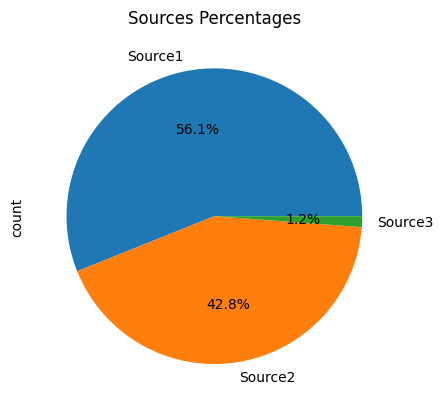

In [89]:
plt.style.use("default")
data['Source'].value_counts().plot(kind='pie', title="Sources Percentages",autopct='%1.1f%%')

### Road Features

###### Amenity - Bump - Give_Way - Junction - No_Exit - Railway - Roundabout - Station - Stop¶
###### Traffic_Calming - Turning_Loop - Nautical_Twilight - Astronomical_Twilight

### Road Features

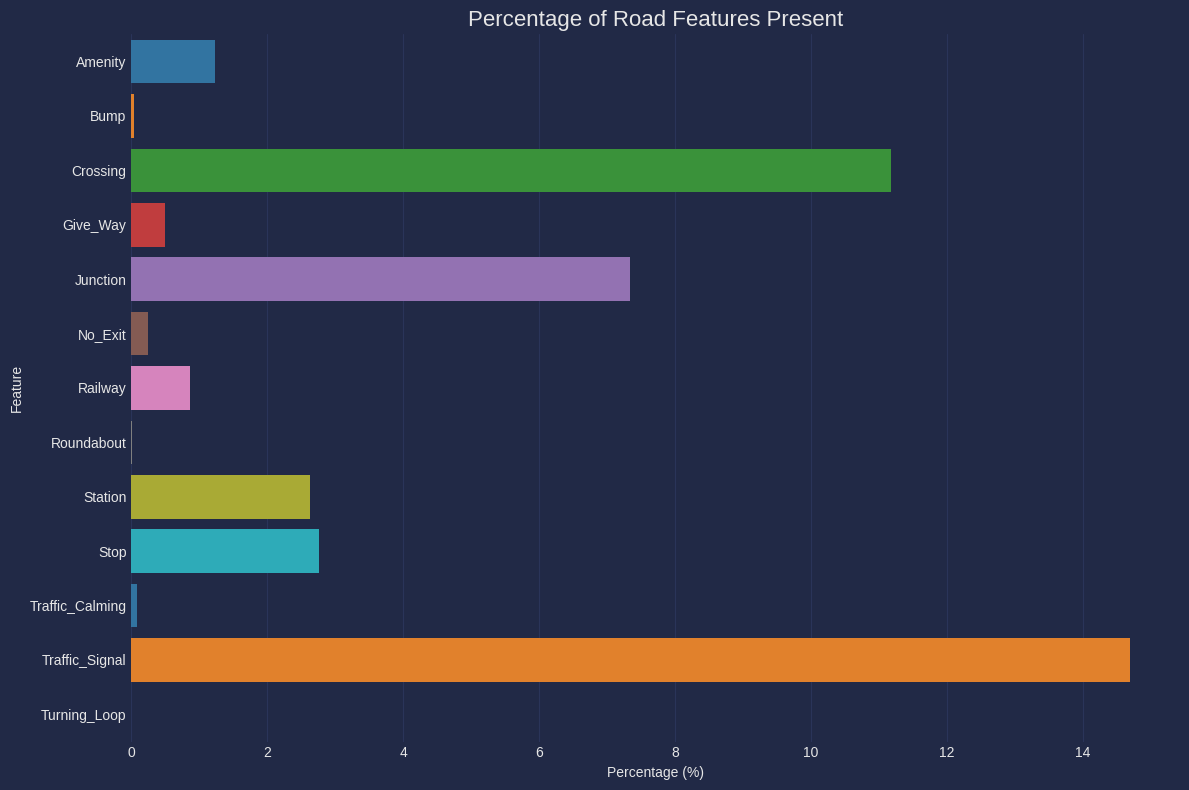

In [90]:
import mplcyberpunk

plt.style.use("cyberpunk")

# Select boolean columns and convert to int
selected_columns = data.iloc[:, 21:34].astype(int)

# Melt to long format
df_melted = selected_columns.melt(var_name="Feature", value_name="Value")

# Calculate the percentage of 1s for each feature
percentages = df_melted.groupby("Feature")["Value"].mean().reset_index()
percentages["Value"] *= 100  # convert to percentage

# Plot as bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    data=percentages,
    x="Value",
    y="Feature",
    palette="tab10"
)

plt.title("Percentage of Road Features Present", fontsize=16)
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Nautical_Twilight

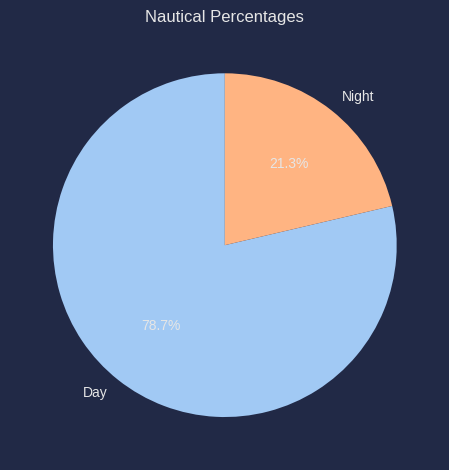

In [91]:
Nautical = data['Nautical_Twilight'].value_counts()

plt.pie(
    Nautical,
    labels=Nautical.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")
)

plt.title("Nautical Percentages")
plt.tight_layout()
plt.show()

### Astronomical_Twilight

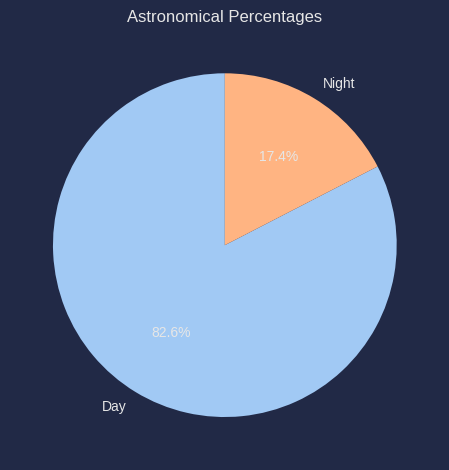

In [92]:
Astronomical = data['Astronomical_Twilight'].value_counts()
plt.pie(
    Astronomical,
    labels=Astronomical.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")
)

plt.title("Astronomical Percentages")
plt.tight_layout()
plt.show()

### Top 5 cities vs Road Features

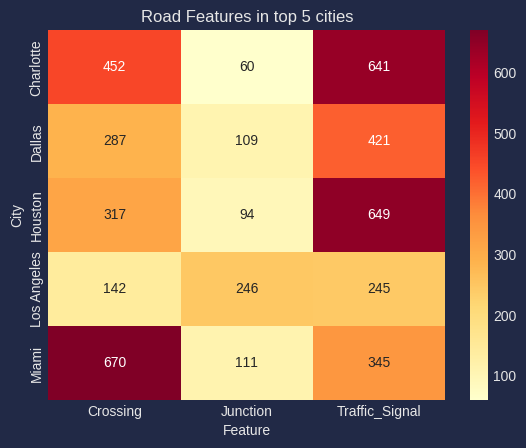

In [93]:
R_features=['Crossing','Junction','Traffic_Signal']
city5=data['City'].value_counts().head(5)
df_top_cities = data[data['City'].isin(city5.index)]

CityVsFeature = df_top_cities.groupby('City')[R_features].sum()

sns.heatmap(CityVsFeature, annot=True, cmap='YlOrRd', fmt='g')
plt.title('Road Features in top 5 cities')
plt.ylabel('City')
plt.xlabel('Feature')
plt.show()

### Siverity vs Road Features

/tmp/ipykernel_19/3988556560.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



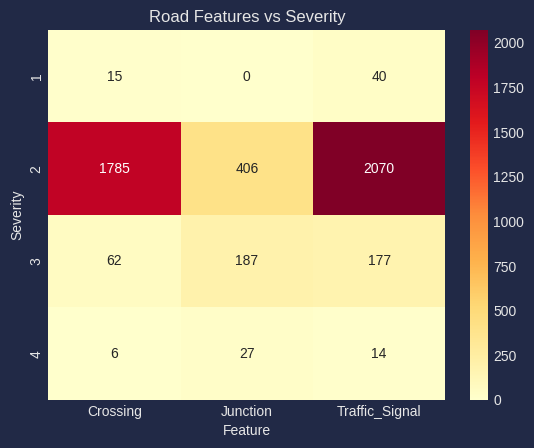

In [94]:
SiverityVsFeature = df_top_cities.groupby('Severity')[R_features].sum()

sns.heatmap(SiverityVsFeature, annot=True, cmap='YlOrRd', fmt='g')
plt.title('Road Features vs Severity')
plt.ylabel('Severity')
plt.xlabel('Feature')
plt.show()